# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ ‚Ññ4
–§–æ—Ä–º—É–ª–∏—Ä—É–µ–º –∑–∞–¥–∞—á—É –≤ —Ç–µ—Ä–º–∏–Ω–∞—Ö ML

*–í—ã–ø–æ–ª–Ω–∏–ª–∞ –ë–µ–≥—É—à–µ–≤–∞ –≠–ª–∏–Ω–∞*

## –ß–∞—Å—Ç—å 1. –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –ø–µ—Ä–≤–∏—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

–ò–º–ø–æ—Ä—Ç –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import requests
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report, f1_score, roc_auc_score, average_precision_score
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from lazypredict.Supervised import LazyClassifier
from tqdm.auto import tqdm  # –∑–∞–º–µ–Ω–∏—Ç notebook_tqdm
import lazypredict.Supervised
lazypredict.Supervised.notebook_tqdm = tqdm  # –ø–∞—Ç—á
import networkx as nx
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score


### 1.1 –ó–∞–≥—Ä—É–∑–∫–∞, –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∏ –æ–ø–∏—Å–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞

*–ò—Å—Ç–æ—á–Ω–∏–∫*: https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml

In [21]:
df = pd.read_csv("SAML-D.csv")

In [3]:
n_rows, n_cols = df.shape

print(f" ‚ùó–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: {n_rows:,} —Å—Ç—Ä–æ–∫ √ó {n_cols} —Å—Ç–æ–ª–±—Ü–æ–≤")

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\n‚ùó–ß–∏—Å–ª–æ–≤—ã–µ –∫–æ–ª–æ–Ω–∫–∏: {numerical_cols}")
print(f"\n‚ùó–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏: {categorical_cols}")

print("\n ‚ùó–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:")
display(df.head())

print("\n ‚ùó–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Ç–∏–ø–µ —Å—Ç–æ–ª–±—Ü–æ–≤:")
df.info()

print("\n ‚ùó–û–ø–∏—Å–∞—Ç–µ–ª—å–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏:")
display(df.describe())

print("\n ‚ùó–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–≤—É—Å–∫–æ–≤ –≤ –∫–∞–∂–¥–æ–º —Å—Ç–æ–ª–±—Ü–µ:")
display(df.isnull().sum())

class_counts = df["Is_laundering"].value_counts().sort_index()
class_percent = (class_counts / len(df) * 100).round(4)

balance_df = pd.DataFrame({
    "–ö–ª–∞—Å—Å": ["–û–±—ã—á–Ω—ã–µ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ (0)", "–û—Ç–º—ã–≤–∞–Ω–∏–µ (1)"],
    "–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ": class_counts.values,
    "–î–æ–ª—è (%)": class_percent.values
})

print("\n ‚ùó–ë–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤:")
display(balance_df)

print("\n ‚ùó–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:")
unique_counts = df.nunique().sort_values(ascending=False)
display(unique_counts)

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

if missing_values.empty:
    print("\n‚ùó–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ—Ç")
else:
    print("\n‚ùó–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:")
    display(missing_values)

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

duplicate_count = df.duplicated().sum()
print(f"\n‚ùó–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏—Ä—É—é—â–∏—Ö—Å—è —Å—Ç—Ä–æ–∫: {duplicate_count}")

 ‚ùó–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: 9,504,852 —Å—Ç—Ä–æ–∫ √ó 12 —Å—Ç–æ–ª–±—Ü–æ–≤

‚ùó–ß–∏—Å–ª–æ–≤—ã–µ –∫–æ–ª–æ–Ω–∫–∏: ['Sender_account', 'Receiver_account', 'Amount', 'Is_laundering']

‚ùó–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏: ['Time', 'Date', 'Payment_currency', 'Received_currency', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_type', 'Laundering_type']

 ‚ùó–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:


Time        Date  Sender_account  Receiver_account   Amount  \
0  10:35:19  2022-10-07      8724731955        2769355426  1459.15   
1  10:35:20  2022-10-07      1491989064        8401255335  6019.64   
2  10:35:20  2022-10-07       287305149        4404767002 14328.44   
3  10:35:21  2022-10-07      5376652437        9600420220 11895.00   
4  10:35:21  2022-10-07      9614186178        3803336972   115.25   

  Payment_currency Received_currency Sender_bank_location  \
0        UK pounds         UK pounds                   UK   
1        UK pounds            Dirham                   UK   
2        UK pounds         UK pounds                   UK   
3        UK pounds         UK pounds                   UK   
4        UK pounds         UK pounds                   UK   

  Receiver_bank_location  Payment_type  Is_laundering       Laundering_type  
0                     UK  Cash Deposit              0  Normal_Cash_Deposits  
1                    UAE  Cross-border              0        Normal_Fan_Out  
2                     UK        Cheque              0  Normal_Small_Fan_Out  
3                     UK           ACH              0         Normal_Fan_In  
4                     UK  Cash Deposit              0  Normal_Cash_Deposits


 ‚ùó–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Ç–∏–ø–µ —Å—Ç–æ–ª–±—Ü–æ–≤:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Date                    object 
 2   Sender_account          int64  
 3   Receiver_account        int64  
 4   Amount                  float64
 5   Payment_currency        object 
 6   Received_currency       object 
 7   Sender_bank_location    object 
 8   Receiver_bank_location  object 
 9   Payment_type            object 
 10  Is_laundering           int64  
 11  Laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB

 ‚ùó–û–ø–∏—Å–∞—Ç–µ–ª—å–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏:


Sender_account  Receiver_account      Amount  Is_laundering
count      9504852.00        9504852.00  9504852.00     9504852.00
mean    5006619409.97     5006006469.65     8762.97           0.00
std     2885813892.13     2884762983.27    25614.95           0.03
min           9018.00           9018.00        3.73           0.00
25%     2513133245.00     2513219464.00     2143.69           0.00
50%     5001016667.00     5002572491.50     6113.72           0.00
75%     7505051146.00     7502397427.00    10458.46           0.00
max     9999986843.00     9999971095.00 12618498.40           1.00


 ‚ùó–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–≤—É—Å–∫–æ–≤ –≤ –∫–∞–∂–¥–æ–º —Å—Ç–æ–ª–±—Ü–µ:


Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64


 ‚ùó–ë–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤:


–ö–ª–∞—Å—Å  –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ  –î–æ–ª—è (%)
0  –û–±—ã—á–Ω—ã–µ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ (0)     9494979     99.90
1           –û—Ç–º—ã–≤–∞–Ω–∏–µ (1)        9873      0.10


 ‚ùó–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:


Amount                    2314277
Receiver_account           652266
Sender_account             292715
Time                        86400
Date                          321
Laundering_type                28
Receiver_bank_location         18
Sender_bank_location           18
Received_currency              13
Payment_currency               13
Payment_type                    7
Is_laundering                   2
dtype: int64


‚ùó–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ—Ç

‚ùó–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏—Ä—É—é—â–∏—Ö—Å—è —Å—Ç—Ä–æ–∫: 0


**–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞—Ç—ã: –≤—ã–¥–µ–ª—è–µ–º –≥–æ–¥, –º–µ—Å—è—Ü, –¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏, —á–∞—Å**

In [22]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", format="%Y-%m-%d")

df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["weekday"] = df["Date"].dt.weekday + 1
df["hour"] = df["Time"].str[:2].astype(int)

In [23]:
df['hour'] = df['hour'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['month'] = df['month'].astype('category')
df['year'] = df['year'].astype('category')

In [8]:
print(f"‚ùó–ù–∞—á–∞–ª–æ –¥–∏–∞–ø–∞–∑–æ–Ω–∞: {df['Date'].min().date()}")
print(f"\n‚ùó–ö–æ–Ω–µ—Ü –¥–∏–∞–ø–∞–∑–æ–Ω–∞:  {df['Date'].max().date()}")

‚ùó–ù–∞—á–∞–ª–æ –¥–∏–∞–ø–∞–∑–æ–Ω–∞: 2022-10-07

‚ùó–ö–æ–Ω–µ—Ü –¥–∏–∞–ø–∞–∑–æ–Ω–∞:  2023-08-23


__–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –¥–ª—è Amount –Ω–µ —Ç—Ä–µ–±—É—é—Ç—Å—è__, —Ç–∞–∫ –∫–∞–∫ "–í–∞–ª—é—Ç–∞ –¥–ª—è ¬´–°—É–º–º—ã¬ª ‚Äî –±—Ä–∏—Ç–∞–Ω—Å–∫–∏–µ —Ñ—É–Ω—Ç—ã (¬£)" 

*–ò—Å—Ç–æ—á–Ω–∏–∫*: https://www.kaggle.com/datasets/berkanoztas/synthetic-transaction-monitoring-dataset-aml/discussion/510003

**–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤–∞–ª—é—Ç—ã: –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ —Ñ–æ—Ä–º–∞—Ç ISO**

In [24]:
payment_currencies = set(df["Payment_currency"].unique())
received_currencies = set(df["Received_currency"].unique())

all_currencies = sorted(payment_currencies.union(received_currencies))

print("–í—Å–µ –≤–∞–ª—é—Ç—ã, –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–µ—Å—è –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ")
for currency in all_currencies:
    print("-", currency)

–í—Å–µ –≤–∞–ª—é—Ç—ã, –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–µ—Å—è –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ
- Albanian lek
- Dirham
- Euro
- Indian rupee
- Mexican Peso
- Moroccan dirham
- Naira
- Pakistani rupee
- Swiss franc
- Turkish lira
- UK pounds
- US dollar
- Yen


In [25]:
# –°–æ–∑–¥–∞–Ω–∏–µ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ —Å —Ä–∞—Å—à–∏—Ñ—Ä–æ–≤–∫–æ–π ISO-–∫–æ–¥–æ–≤
currency_names = {
    "GBP": "UK pounds",
    "EUR": "Euro",
    "JPY": "Yen",
    "TRY": "Turkish lira",
    "CHF": "Swiss franc",
    "USD": "US dollar",
    "AED": "Dirham",
    "INR": "Indian rupee",
    "NGN": "Naira",
    "PKR": "Pakistani rupee",
    "MAD": "Moroccan dirham",
    "ALL": "Albanian lek",
    "MXN": "Mexican Peso"
}

currency_df = pd.DataFrame(list(currency_names.items()), columns=["ISO-–∫–æ–¥", "–û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–µ –æ–±–æ–∑–Ω–∞—á–µ–Ω–∏–µ"])

currency_df.sort_values("ISO-–∫–æ–¥").reset_index(drop=True)

ISO-–∫–æ–¥ –û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–µ –æ–±–æ–∑–Ω–∞—á–µ–Ω–∏–µ
0      AED                   Dirham
1      ALL             Albanian lek
2      CHF              Swiss franc
3      EUR                     Euro
4      GBP                UK pounds
5      INR             Indian rupee
6      JPY                      Yen
7      MAD          Moroccan dirham
8      MXN             Mexican Peso
9      NGN                    Naira
10     PKR          Pakistani rupee
11     TRY             Turkish lira
12     USD                US dollar

In [26]:
currency_names_reversed = {v: k for k, v in currency_names.items()}

In [27]:
df["Payment_currency_iso"] = df["Payment_currency"].map(currency_names_reversed)
df["Received_currency_iso"] = df["Received_currency"].map(currency_names_reversed)

In [28]:
df = df.drop(columns=["Payment_currency", "Received_currency"])

In [14]:
n_rows, n_cols = df.shape

print(f" ‚ùó–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: {n_rows:,} —Å—Ç—Ä–æ–∫ √ó {n_cols} —Å—Ç–æ–ª–±—Ü–æ–≤")

umerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\n‚ùó–ß–∏—Å–ª–æ–≤—ã–µ –∫–æ–ª–æ–Ω–∫–∏: {numerical_cols}")
print(f"\n‚ùó–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏: {categorical_cols}")

print("\n ‚ùó–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:")
display(df.head())

print("\n ‚ùó–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Ç–∏–ø–µ —Å—Ç–æ–ª–±—Ü–æ–≤:")
df.info()

print("\n ‚ùó–û–ø–∏—Å–∞—Ç–µ–ª—å–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏:")
display(df.describe())

class_counts = df["Is_laundering"].value_counts().sort_index()
class_percent = (class_counts / len(df) * 100).round(4)

balance_df = pd.DataFrame({
    "–ö–ª–∞—Å—Å": ["–û–±—ã—á–Ω—ã–µ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ (0)", "–û—Ç–º—ã–≤–∞–Ω–∏–µ (1)"],
    "–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ": class_counts.values,
    "–î–æ–ª—è (%)": class_percent.values
})

print("\n ‚ùó–ë–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤:")
display(balance_df)

print("\n ‚ùó–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:")
unique_counts = df.nunique().sort_values(ascending=False)
display(unique_counts)

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

if missing_values.empty:
    print("\n‚ùó–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ—Ç")
else:
    print("\n‚ùó–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è:")
    display(missing_values)

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

duplicate_count = df.duplicated().sum()
print(f"\n‚ùó–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏—Ä—É—é—â–∏—Ö—Å—è —Å—Ç—Ä–æ–∫: {duplicate_count}")


 ‚ùó–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: 9,504,852 —Å—Ç—Ä–æ–∫ √ó 16 —Å—Ç–æ–ª–±—Ü–æ–≤

‚ùó–ß–∏—Å–ª–æ–≤—ã–µ –∫–æ–ª–æ–Ω–∫–∏: ['Sender_account', 'Receiver_account', 'Amount', 'Is_laundering']

‚ùó–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏: ['Time', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_type', 'Laundering_type', 'year', 'month', 'weekday', 'hour', 'Payment_currency_iso', 'Received_currency_iso']

 ‚ùó–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:


Time       Date  Sender_account  Receiver_account   Amount  \
0  10:35:19 2022-10-07      8724731955        2769355426  1459.15   
1  10:35:20 2022-10-07      1491989064        8401255335  6019.64   
2  10:35:20 2022-10-07       287305149        4404767002 14328.44   
3  10:35:21 2022-10-07      5376652437        9600420220 11895.00   
4  10:35:21 2022-10-07      9614186178        3803336972   115.25   

  Sender_bank_location Receiver_bank_location  Payment_type  Is_laundering  \
0                   UK                     UK  Cash Deposit              0   
1                   UK                    UAE  Cross-border              0   
2                   UK                     UK        Cheque              0   
3                   UK                     UK           ACH              0   
4                   UK                     UK  Cash Deposit              0   

        Laundering_type  year month weekday hour Payment_currency_iso  \
0  Normal_Cash_Deposits  2022    10       5   10                  GBP   
1        Normal_Fan_Out  2022    10       5   10                  GBP   
2  Normal_Small_Fan_Out  2022    10       5   10                  GBP   
3         Normal_Fan_In  2022    10       5   10                  GBP   
4  Normal_Cash_Deposits  2022    10       5   10                  GBP   

  Received_currency_iso  
0                   GBP  
1                   AED  
2                   GBP  
3                   GBP  
4                   GBP


 ‚ùó–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Ç–∏–ø–µ —Å—Ç–æ–ª–±—Ü–æ–≤:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 16 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Time                    object        
 1   Date                    datetime64[ns]
 2   Sender_account          int64         
 3   Receiver_account        int64         
 4   Amount                  float64       
 5   Sender_bank_location    object        
 6   Receiver_bank_location  object        
 7   Payment_type            object        
 8   Is_laundering           int64         
 9   Laundering_type         object        
 10  year                    category      
 11  month                   category      
 12  weekday                 category      
 13  hour                    category      
 14  Payment_currency_iso    object        
 15  Received_currency_iso   object        
dtypes: category(4), datetime64[ns](1),

Date  Sender_account  Receiver_account  \
count                        9504852      9504852.00        9504852.00   
mean   2023-03-15 21:03:37.048723968   5006619409.97     5006006469.65   
min              2022-10-07 00:00:00         9018.00           9018.00   
25%              2022-12-27 00:00:00   2513133245.00     2513219464.00   
50%              2023-03-15 00:00:00   5001016667.00     5002572491.50   
75%              2023-06-03 00:00:00   7505051146.00     7502397427.00   
max              2023-08-23 00:00:00   9999986843.00     9999971095.00   
std                              NaN   2885813892.13     2884762983.27   

           Amount  Is_laundering  
count  9504852.00     9504852.00  
mean      8762.97           0.00  
min          3.73           0.00  
25%       2143.69           0.00  
50%       6113.72           0.00  
75%      10458.46           0.00  
max   12618498.40           1.00  
std      25614.95           0.03


 ‚ùó–ë–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤:


–ö–ª–∞—Å—Å  –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ  –î–æ–ª—è (%)
0  –û–±—ã—á–Ω—ã–µ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ (0)     9494979     99.90
1           –û—Ç–º—ã–≤–∞–Ω–∏–µ (1)        9873      0.10


 ‚ùó–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º:


Amount                    2314277
Receiver_account           652266
Sender_account             292715
Time                        86400
Date                          321
Laundering_type                28
hour                           24
Sender_bank_location           18
Receiver_bank_location         18
Payment_currency_iso           13
Received_currency_iso          13
month                          11
Payment_type                    7
weekday                         7
year                            2
Is_laundering                   2
dtype: int64


‚ùó–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ—Ç

‚ùó–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏—Ä—É—é—â–∏—Ö—Å—è —Å—Ç—Ä–æ–∫: 0


### 1.1* –¢–∏–ø—ã –æ—Ç–º—ã–≤–∞–Ω–∏—è (–≤ –±–µ–π–∑–ª–∞–π–Ω–µ –Ω–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è)

In [15]:
laundering_mapping = (
    df[["Laundering_type", "Is_laundering"]]
    .drop_duplicates()
    .sort_values(by=["Laundering_type", "Is_laundering"])
    .reset_index(drop=True)
)

display(laundering_mapping)

Laundering_type  Is_laundering
0     Behavioural_Change_1              1
1     Behavioural_Change_2              1
2                Bipartite              1
3          Cash_Withdrawal              1
4                    Cycle              1
5             Deposit-Send              1
6                   Fan_In              1
7                  Fan_Out              1
8           Gather-Scatter              1
9           Layered_Fan_In              1
10         Layered_Fan_Out              1
11    Normal_Cash_Deposits              0
12  Normal_Cash_Withdrawal              0
13           Normal_Fan_In              0
14          Normal_Fan_Out              0
15           Normal_Foward              0
16            Normal_Group              0
17           Normal_Mutual              0
18       Normal_Periodical              0
19      Normal_Plus_Mutual              0
20    Normal_Small_Fan_Out              0
21     Normal_single_large              0
22          Over-Invoicing              1
23          Scatter-Gather              1
24            Single_large              1
25                Smurfing              1
26       Stacked Bipartite              1
27             Structuring              1

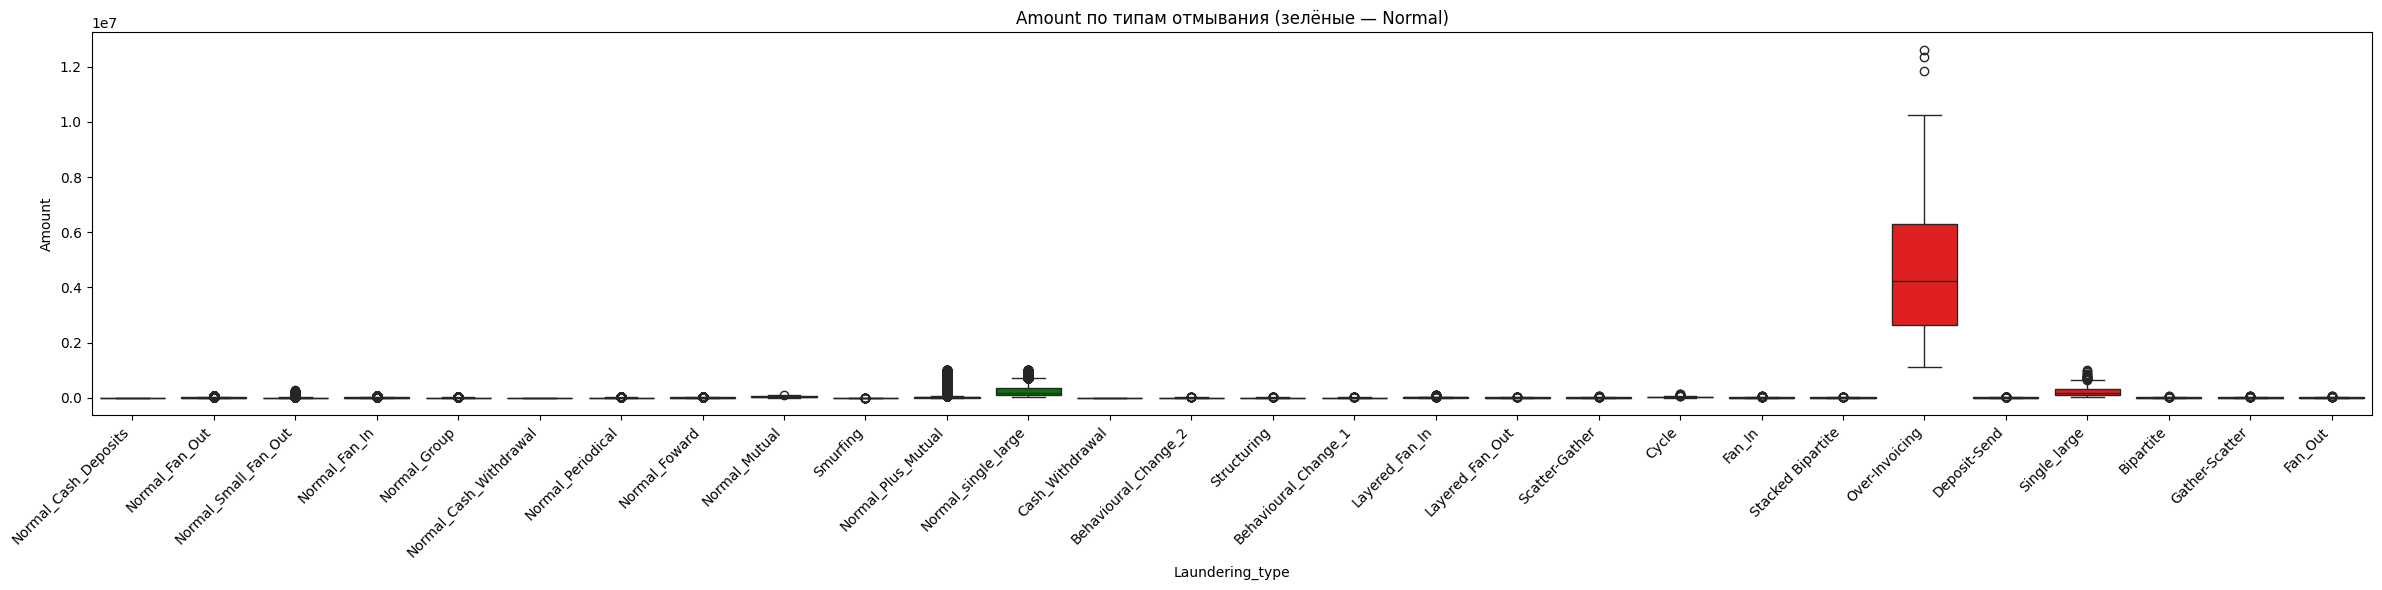

In [16]:
# —Å–æ–∑–¥–∞—ë–º –∫–æ–ª–æ–Ω–∫—É-—Ñ–ª–∞–≥: True, –µ—Å–ª–∏ Laundering_type –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è —Å 'Normal'
df['Is_Normal'] = df['Laundering_type'].str.startswith('Normal')

# —Å–æ–∑–¥–∞—ë–º –ø–∞–ª–∏—Ç—Ä—É: –∑–µ–ª—ë–Ω—ã–π –¥–ª—è Normal, –∫—Ä–∞—Å–Ω—ã–π –¥–ª—è –æ—Å—Ç–∞–ª—å–Ω—ã—Ö
palette = {
    laundering_type: 'green' if is_normal else 'red'
    for laundering_type, is_normal in zip(
        df['Laundering_type'].unique(),
        df.groupby('Laundering_type')['Is_Normal'].first()
    )
}

# —Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫
plt.figure(figsize=(24, 6))  # –º–æ–∂–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç—å —à–∏—Ä–∏–Ω—É –ø—Ä–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏
sns.boxplot(x='Laundering_type', y='Amount', data=df, palette=palette)
plt.xticks(rotation=45, ha='right')
plt.title('Amount –ø–æ —Ç–∏–ø–∞–º –æ—Ç–º—ã–≤–∞–Ω–∏—è (–∑–µ–ª—ë–Ω—ã–µ ‚Äî Normal)')
plt.tight_layout()
plt.show()

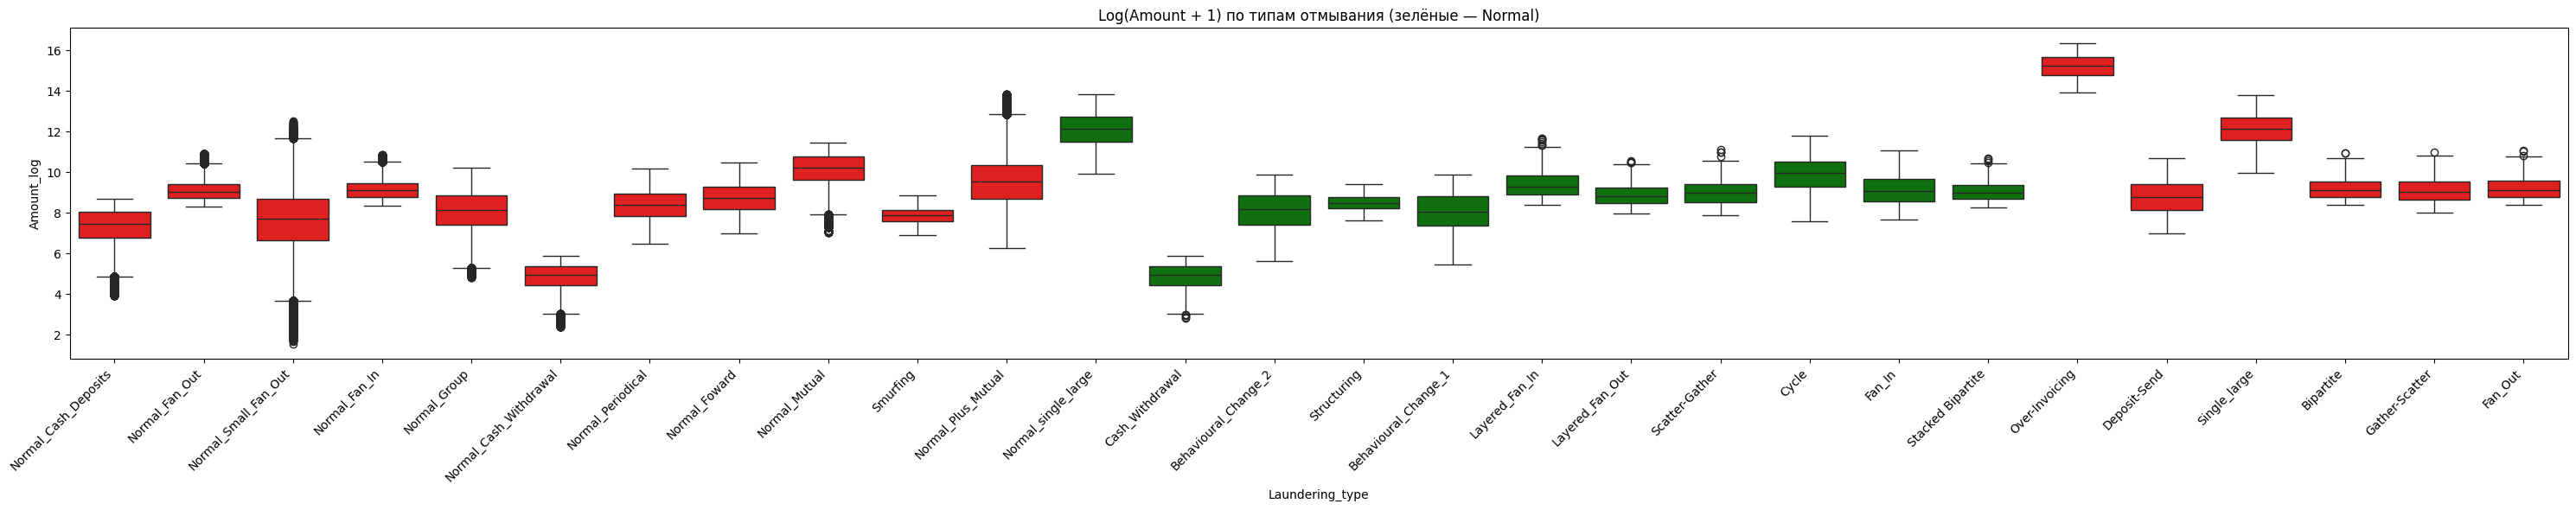

In [17]:
# –°–æ–∑–¥–∞–Ω–∏–µ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
df['Amount_log'] = np.log1p(df['Amount'])

# –°–æ–∑–¥–∞–µ–º –∫–æ–ª–æ–Ω–∫—É, –æ–ø—Ä–µ–¥–µ–ª—è—é—â—É—é —Ü–≤–µ—Ç: True, –µ—Å–ª–∏ —Ç–∏–ø –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è —Å 'Normal'
df['Is_Normal'] = df['Laundering_type'].str.startswith('Normal')

# –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º —Ü–≤–µ—Ç–æ–≤—É—é –ø–∞–ª–∏—Ç—Ä—É
palette = {lt: 'green' if is_normal else 'red' 
           for lt, is_normal in zip(df['Laundering_type'].unique(), 
                                     df.groupby('Laundering_type')['Is_Normal'].first())}

# –ì—Ä–∞—Ñ–∏–∫ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
plt.figure(figsize=(30, 6))
sns.boxplot(x='Laundering_type', y='Amount_log', data=df, palette=palette)
plt.xticks(rotation=45, ha='right')
plt.title('Log(Amount + 1) –ø–æ —Ç–∏–ø–∞–º –æ—Ç–º—ã–≤–∞–Ω–∏—è (–∑–µ–ª—ë–Ω—ã–µ ‚Äî Normal)')
plt.tight_layout()
plt.show()

### 1.2 –î–∞—Ç–∞, –≤—Ä–µ–º—è

In [18]:
time_cols = ["year", "month", "weekday", "hour"]

df[time_cols].describe().T

count  unique   top     freq
year     9504852       2  2023  6998236
month    9504852      11     5   917601
weekday  9504852       7     1  1389246
hour     9504852      24    13   540796

**–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—Å–µ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –∏ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å –∞–ª–µ—Ä—Ç–æ–º –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏**

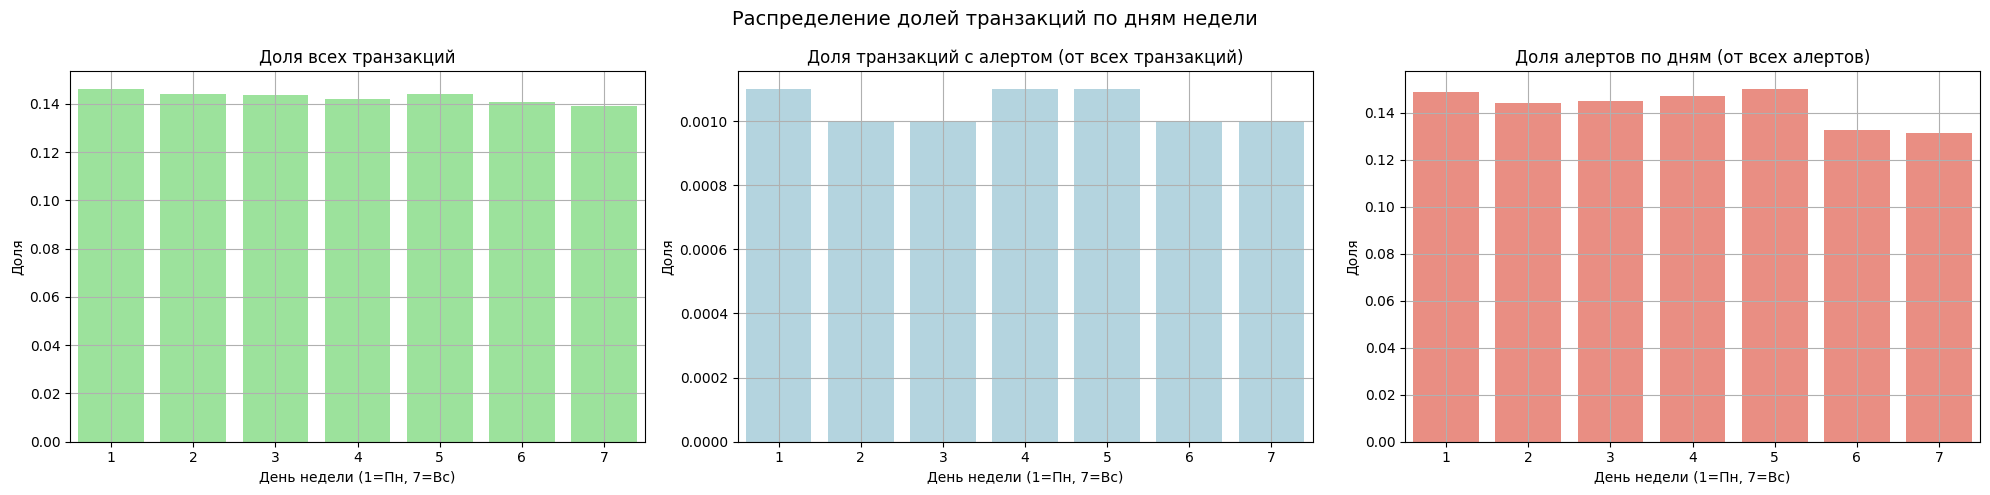

In [19]:
day_data = df.groupby("weekday")["Is_laundering"].agg(
    count="count",
    laundering_count="sum"
).reset_index()

day_data["laundering_rate"] = (day_data["laundering_count"] / day_data["count"]).round(4)

total_laundering = day_data["laundering_count"].sum()
day_data["laundering_share_overall"] = (day_data["laundering_count"] / total_laundering).round(4)

weekday_share = (
    df["weekday"].value_counts(normalize=True)
    .sort_index()
    .rename_axis("weekday")
    .reset_index(name="share")
)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(data=weekday_share, x="weekday", y="share", color="lightgreen", ax=axes[0])
axes[0].set_title("–î–æ–ª—è –≤—Å–µ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π")
axes[0].set_xlabel("–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏ (1=–ü–Ω, 7=–í—Å)")
axes[0].set_ylabel("–î–æ–ª—è")
axes[0].grid()

sns.barplot(data=day_data, x="weekday", y="laundering_rate", color="lightblue", ax=axes[1])
axes[1].set_title("–î–æ–ª—è —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å –∞–ª–µ—Ä—Ç–æ–º (–æ—Ç –≤—Å–µ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π)")
axes[1].set_xlabel("–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏ (1=–ü–Ω, 7=–í—Å)")
axes[1].set_ylabel("–î–æ–ª—è")
axes[1].grid()

sns.barplot(data=day_data, x="weekday", y="laundering_share_overall", color="salmon", ax=axes[2])
axes[2].set_title("–î–æ–ª—è –∞–ª–µ—Ä—Ç–æ–≤ –ø–æ –¥–Ω—è–º (–æ—Ç –≤—Å–µ—Ö –∞–ª–µ—Ä—Ç–æ–≤)")
axes[2].set_xlabel("–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏ (1=–ü–Ω, 7=–í—Å)")
axes[2].set_ylabel("–î–æ–ª—è")
axes[2].grid()

plt.suptitle("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–ª–µ–π —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏", fontsize=14)
plt.tight_layout()
plt.show()

**–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—Å–µ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –∏ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å –∞–ª–µ—Ä—Ç–æ–º –ø–æ —á–∞—Å–∞–º**

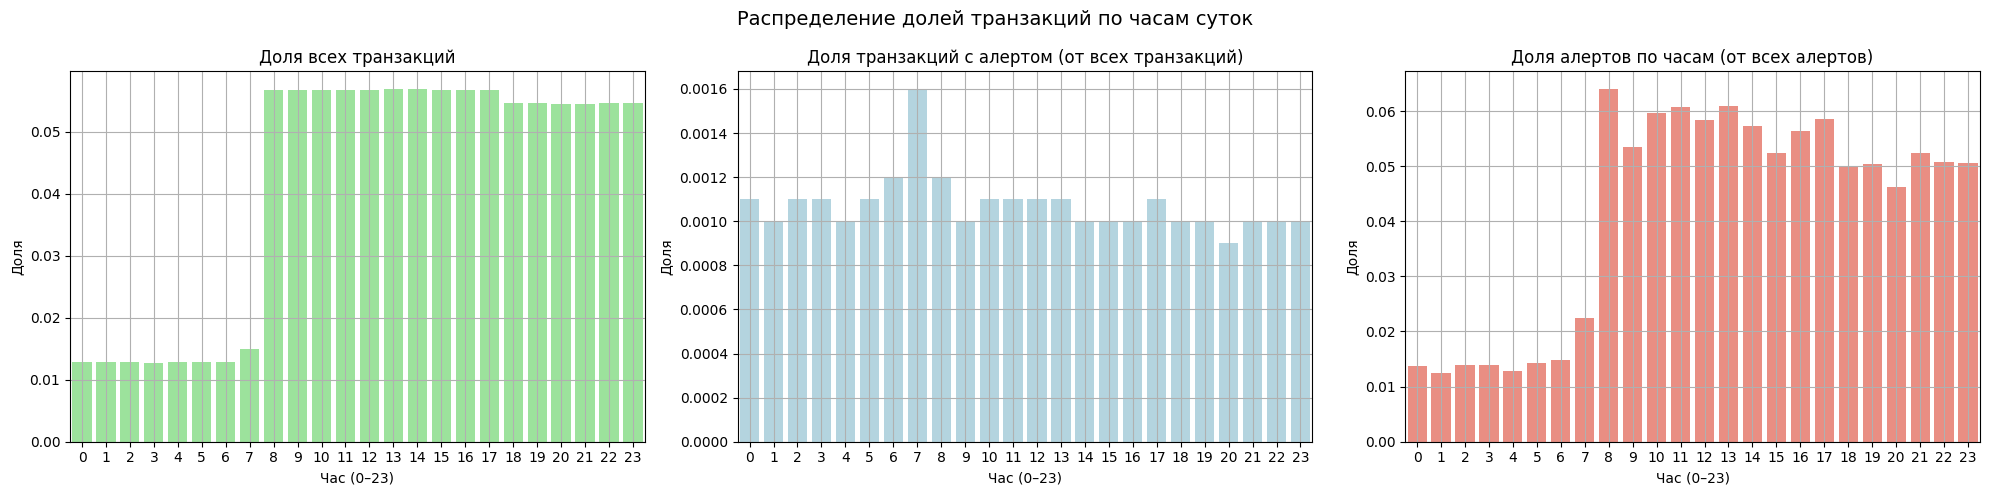

In [20]:
hour_share = (
    df["hour"].value_counts(normalize=True)
    .sort_index()
    .rename_axis("hour")
    .reset_index(name="share")
)

hour_data = df.groupby("hour")["Is_laundering"].agg(
    count="count",
    laundering_count="sum"
).reset_index()

hour_data["laundering_rate"] = (hour_data["laundering_count"] / hour_data["count"]).round(4)

total_laundering = hour_data["laundering_count"].sum()
hour_data["laundering_share_overall"] = (hour_data["laundering_count"] / total_laundering).round(4)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(data=hour_share, x="hour", y="share", color="lightgreen", ax=axes[0])
axes[0].set_title("–î–æ–ª—è –≤—Å–µ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π")
axes[0].set_xlabel("–ß–∞—Å (0‚Äì23)")
axes[0].set_ylabel("–î–æ–ª—è")
axes[0].grid()

sns.barplot(data=hour_data, x="hour", y="laundering_rate", color="lightblue", ax=axes[1])
axes[1].set_title("–î–æ–ª—è —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å –∞–ª–µ—Ä—Ç–æ–º (–æ—Ç –≤—Å–µ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π)")
axes[1].set_xlabel("–ß–∞—Å (0‚Äì23)")
axes[1].set_ylabel("–î–æ–ª—è")
axes[1].grid()

sns.barplot(data=hour_data, x="hour", y="laundering_share_overall", color="salmon", ax=axes[2])
axes[2].set_title("–î–æ–ª—è –∞–ª–µ—Ä—Ç–æ–≤ –ø–æ —á–∞—Å–∞–º (–æ—Ç –≤—Å–µ—Ö –∞–ª–µ—Ä—Ç–æ–≤)")
axes[2].set_xlabel("–ß–∞—Å (0‚Äì23)")
axes[2].set_ylabel("–î–æ–ª—è")
axes[2].grid()

plt.suptitle("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–ª–µ–π —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –ø–æ —á–∞—Å–∞–º —Å—É—Ç–æ–∫", fontsize=14)
plt.tight_layout()
plt.show()

**–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—Å–µ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –∏ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å –∞–ª–µ—Ä—Ç–æ–º –ø–æ –º–µ—Å—è—Ü–∞–º**

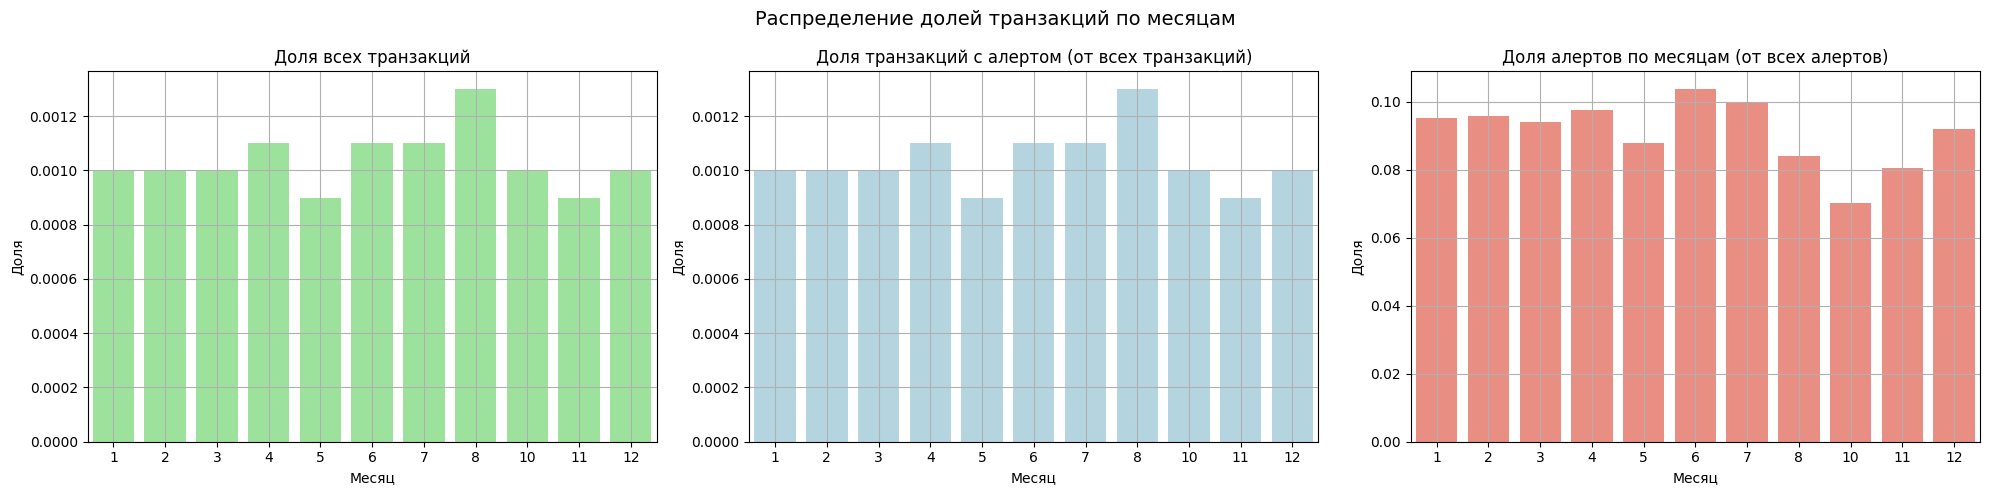

In [21]:
month_data = df.groupby("month")["Is_laundering"].agg(
    count="count",
    laundering_count="sum"
).reset_index()

month_data["laundering_rate"] = (month_data["laundering_count"] / month_data["count"]).round(4)

total_laundering = month_data["laundering_count"].sum()
month_data["laundering_share_overall"] = (month_data["laundering_count"] / total_laundering).round(4)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(data=month_data, x="month", y="laundering_rate", color="lightgreen", ax=axes[0])
axes[0].set_title("–î–æ–ª—è –≤—Å–µ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π")
axes[0].set_xlabel("–ú–µ—Å—è—Ü")
axes[0].set_ylabel("–î–æ–ª—è")
axes[0].grid()

sns.barplot(data=month_data, x="month", y="laundering_rate", color="lightblue", ax=axes[1])
axes[1].set_title("–î–æ–ª—è —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å –∞–ª–µ—Ä—Ç–æ–º (–æ—Ç –≤—Å–µ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π)")
axes[1].set_xlabel("–ú–µ—Å—è—Ü")
axes[1].set_ylabel("–î–æ–ª—è")
axes[1].grid()

sns.barplot(data=month_data, x="month", y="laundering_share_overall", color="salmon", ax=axes[2])
axes[2].set_title("–î–æ–ª—è –∞–ª–µ—Ä—Ç–æ–≤ –ø–æ –º–µ—Å—è—Ü–∞–º (–æ—Ç –≤—Å–µ—Ö –∞–ª–µ—Ä—Ç–æ–≤)")
axes[2].set_xlabel("–ú–µ—Å—è—Ü")
axes[2].set_ylabel("–î–æ–ª—è")
axes[2].grid()

plt.suptitle("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–ª–µ–π —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –ø–æ –º–µ—Å—è—Ü–∞–º", fontsize=14)
plt.tight_layout()
plt.show()

**–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—Å–µ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –∏ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å –∞–ª–µ—Ä—Ç–æ–º –ø–æ –≥–æ–¥–∞–º**

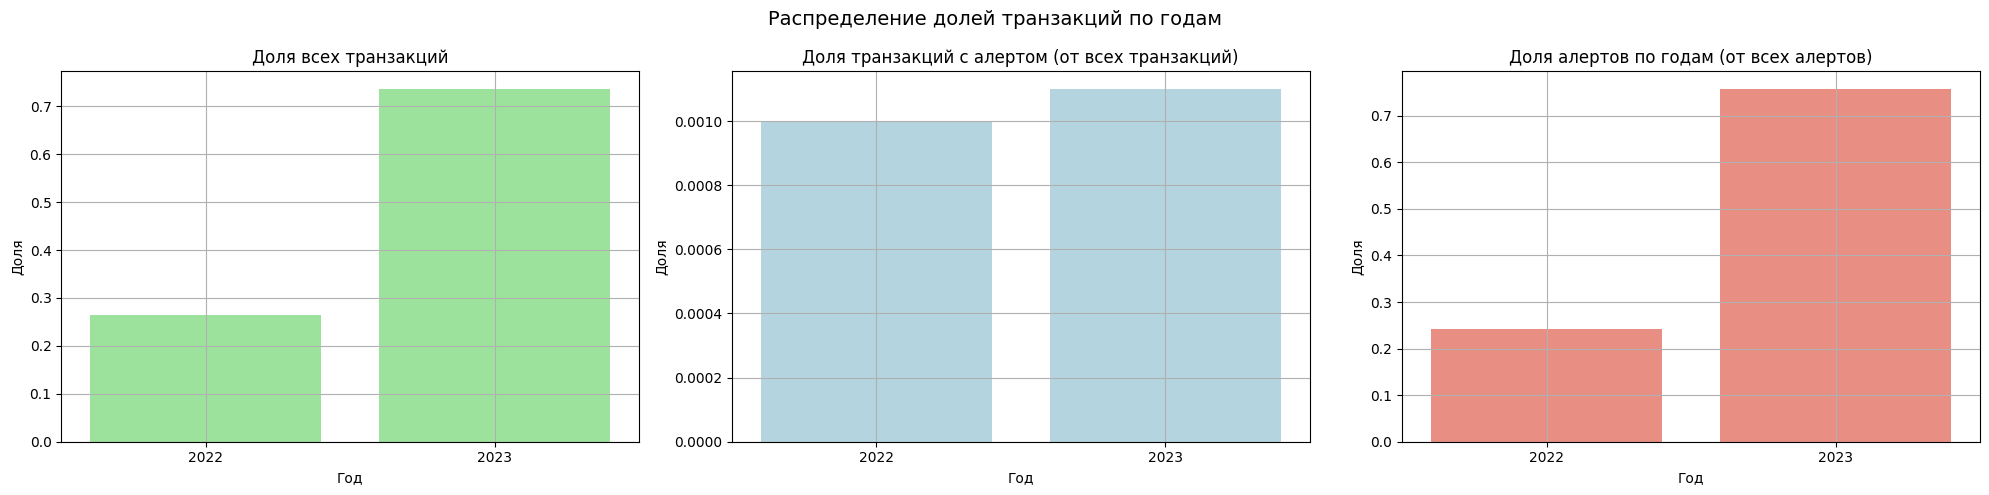

In [22]:
year_share = (
    df["year"].value_counts(normalize=True)
    .sort_index()
    .rename_axis("year")
    .reset_index(name="share")
)

year_data = df.groupby("year")["Is_laundering"].agg(
    count="count",
    laundering_count="sum"
).reset_index()

year_data["laundering_rate"] = (year_data["laundering_count"] / year_data["count"]).round(4)

total_laundering = year_data["laundering_count"].sum()
year_data["laundering_share_overall"] = (year_data["laundering_count"] / total_laundering).round(4)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(data=year_share, x="year", y="share", color="lightgreen", ax=axes[0])
axes[0].set_title("–î–æ–ª—è –≤—Å–µ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π")
axes[0].set_xlabel("–ì–æ–¥")
axes[0].set_ylabel("–î–æ–ª—è")
axes[0].grid()

sns.barplot(data=year_data, x="year", y="laundering_rate", color="lightblue", ax=axes[1])
axes[1].set_title("–î–æ–ª—è —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å –∞–ª–µ—Ä—Ç–æ–º (–æ—Ç –≤—Å–µ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π)")
axes[1].set_xlabel("–ì–æ–¥")
axes[1].set_ylabel("–î–æ–ª—è")
axes[1].grid()

sns.barplot(data=year_data, x="year", y="laundering_share_overall", color="salmon", ax=axes[2])
axes[2].set_title("–î–æ–ª—è –∞–ª–µ—Ä—Ç–æ–≤ –ø–æ –≥–æ–¥–∞–º (–æ—Ç –≤—Å–µ—Ö –∞–ª–µ—Ä—Ç–æ–≤)")
axes[2].set_xlabel("–ì–æ–¥")
axes[2].set_ylabel("–î–æ–ª—è")
axes[2].grid()

plt.suptitle("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–ª–µ–π —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –ø–æ –≥–æ–¥–∞–º", fontsize=14)
plt.tight_layout()
plt.show()

**–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—Å–µ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –∏ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å –∞–ª–µ—Ä—Ç–æ–º –ø–æ —á–∞—Å–∞–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –¥–Ω—è –Ω–µ–¥–µ–ª–∏**

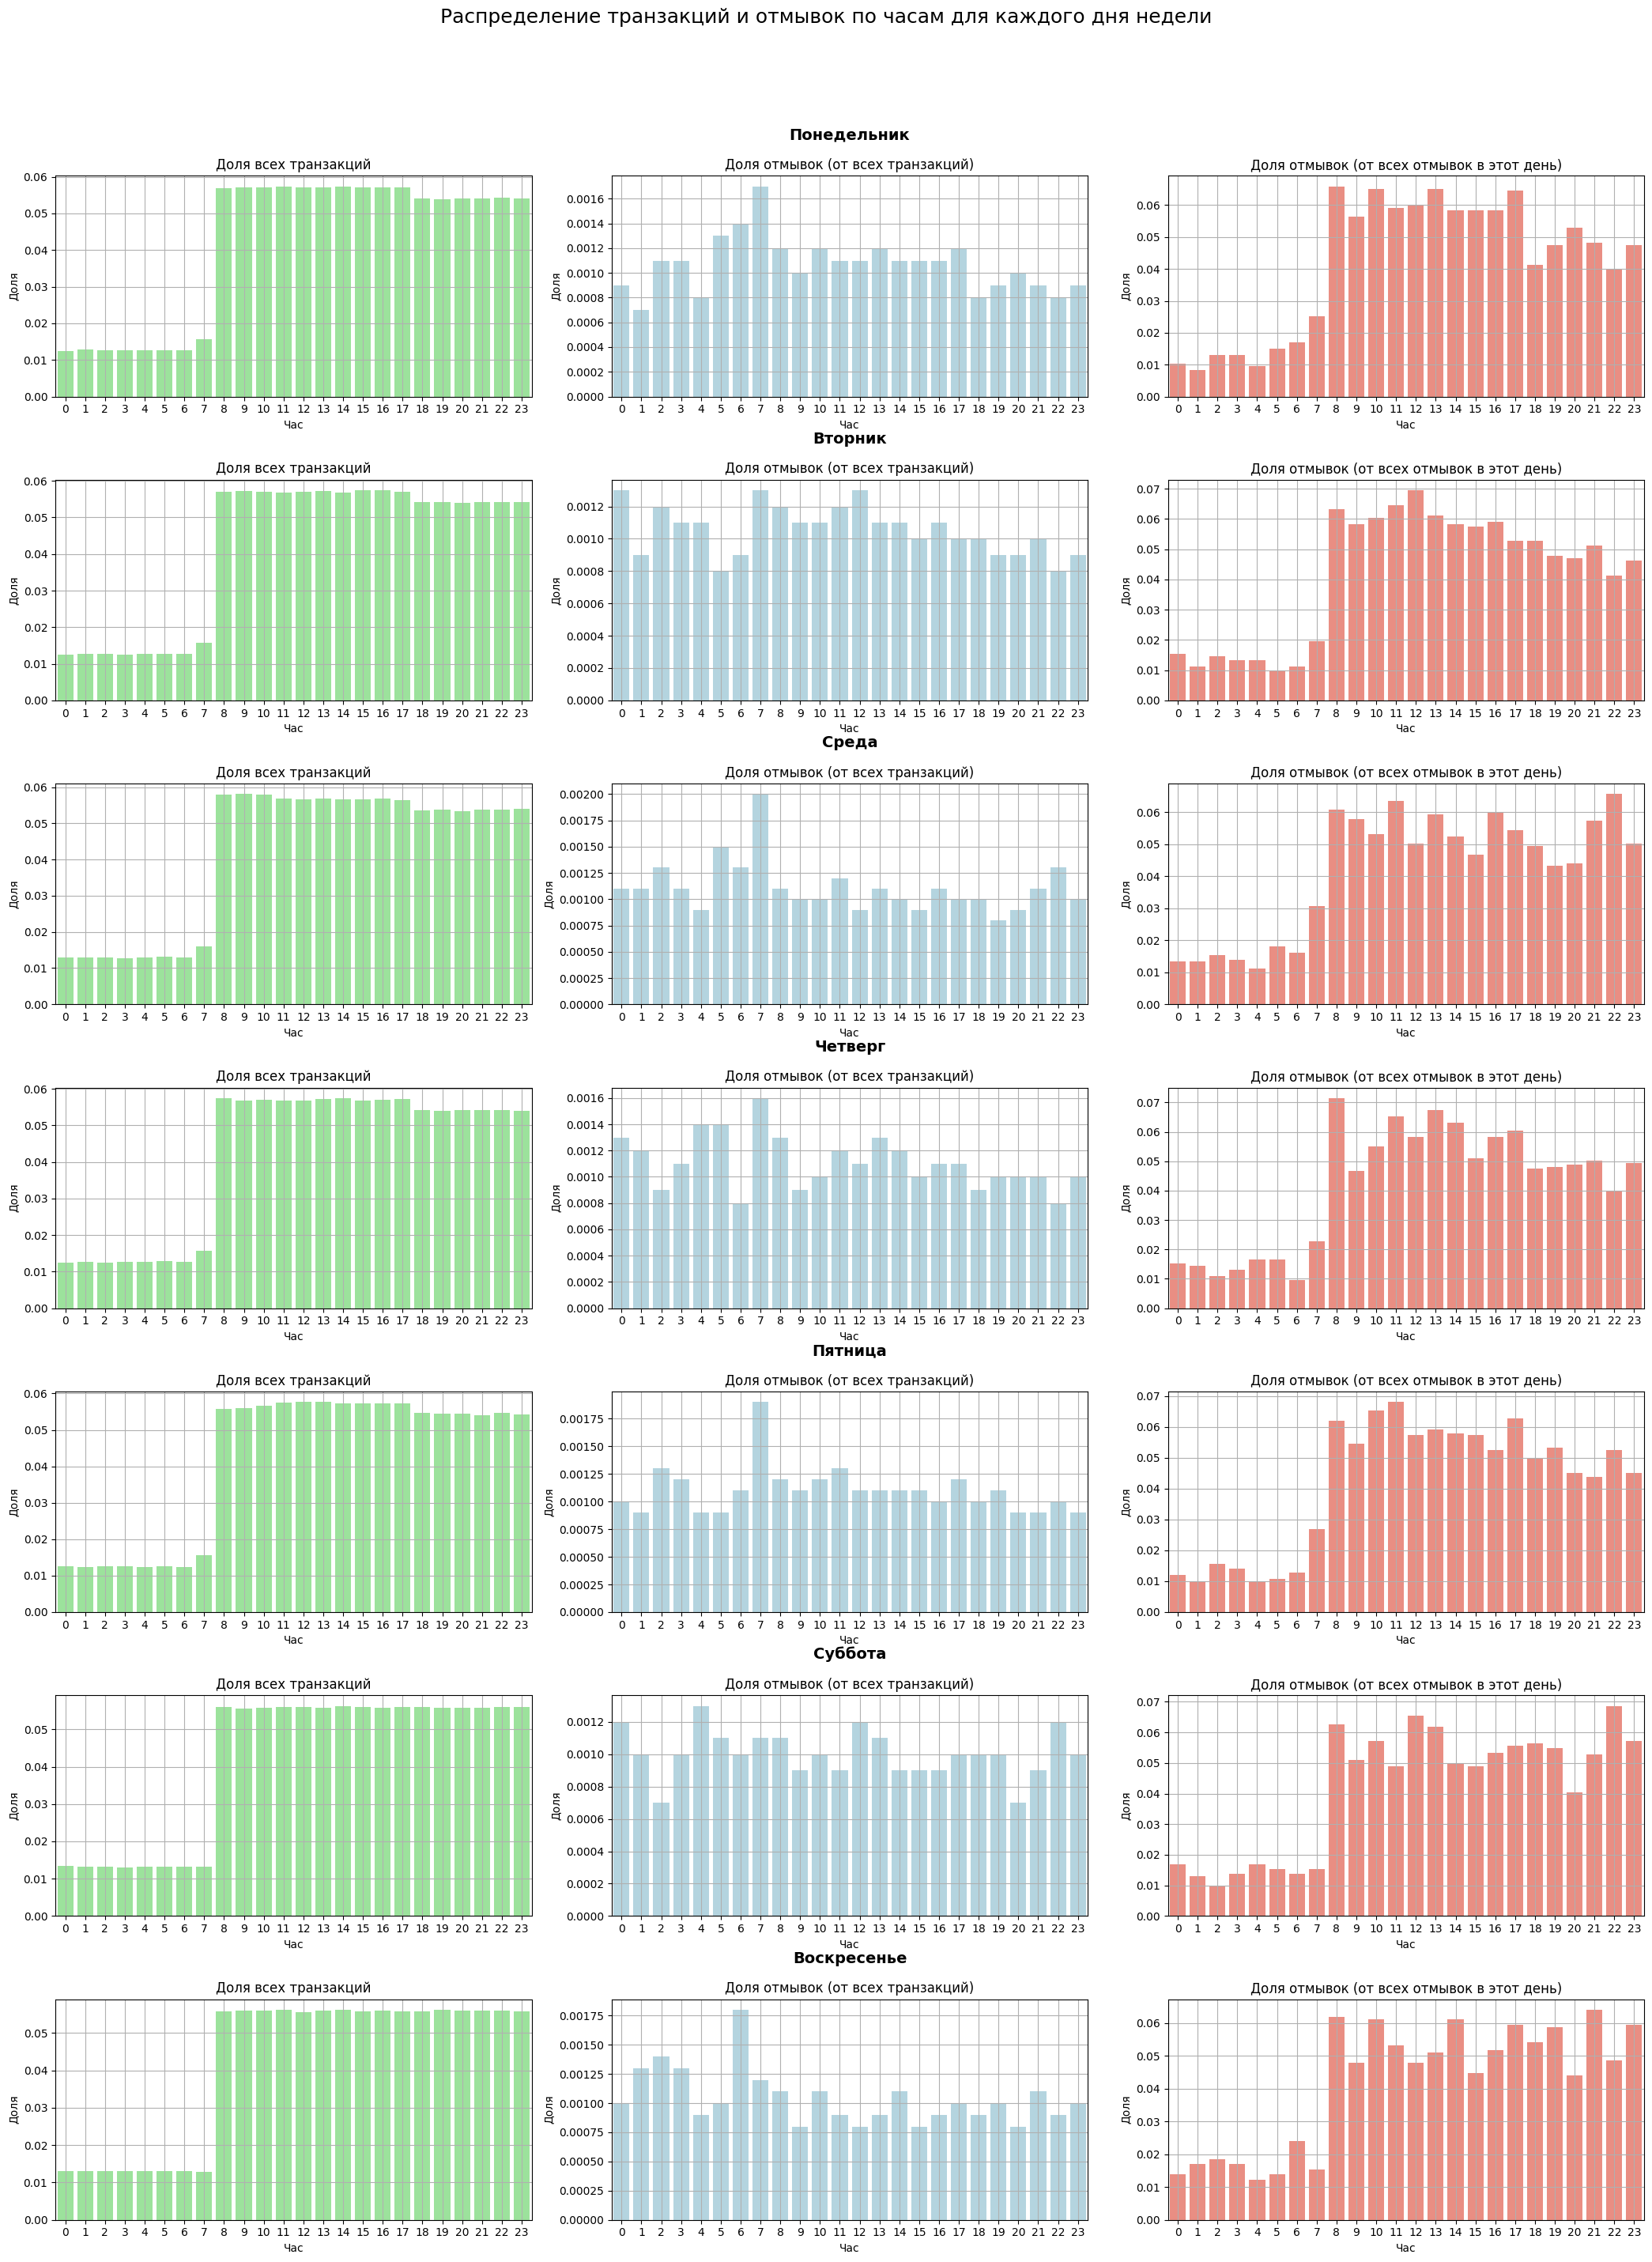

In [23]:
weekday_names = {
    1: "–ü–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫",
    2: "–í—Ç–æ—Ä–Ω–∏–∫",
    3: "–°—Ä–µ–¥–∞",
    4: "–ß–µ—Ç–≤–µ—Ä–≥",
    5: "–ü—è—Ç–Ω–∏—Ü–∞",
    6: "–°—É–±–±–æ—Ç–∞",
    7: "–í–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ"
}

fig, axes = plt.subplots(7, 3, figsize=(21, 28))
plt.subplots_adjust(hspace=0.8)

for i, day in enumerate(range(1, 8)):
    df_day = df[df["weekday"] == day]
    day_name = weekday_names[day]

    hour_share = (
        df_day["hour"].value_counts(normalize=True)
        .sort_index()
        .rename_axis("hour")
        .reset_index(name="share")
    )

    hour_laundering = df_day.groupby("hour")["Is_laundering"].agg(
        count="count",
        laundering_count="sum"
    ).reset_index()

    hour_laundering["rate"] = (
        hour_laundering["laundering_count"] / hour_laundering["count"]
    ).round(4)

    total_laundering = hour_laundering["laundering_count"].sum()
    hour_laundering["share_overall"] = (
        hour_laundering["laundering_count"] / total_laundering
        if total_laundering > 0 else 0
    ).round(4)

    sns.barplot(data=hour_share, x="hour", y="share", color="lightgreen", ax=axes[i, 0])
    axes[i, 0].set_title("–î–æ–ª—è –≤—Å–µ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π")
    axes[i, 0].set_xlabel("–ß–∞—Å")
    axes[i, 0].set_ylabel("–î–æ–ª—è")
    axes[i, 0].grid()

  
    sns.barplot(data=hour_laundering, x="hour", y="rate", color="lightblue", ax=axes[i, 1])
    axes[i, 1].set_title("–î–æ–ª—è –æ—Ç–º—ã–≤–æ–∫ (–æ—Ç –≤—Å–µ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π)")
    axes[i, 1].set_xlabel("–ß–∞—Å")
    axes[i, 1].set_ylabel("–î–æ–ª—è")
    axes[i, 1].grid()

    axes[i, 1].text(0.5, 1.15, day_name,
                   fontsize=14, fontweight='bold',
                   ha='center', va='bottom', transform=axes[i, 1].transAxes)

    sns.barplot(data=hour_laundering, x="hour", y="share_overall", color="salmon", ax=axes[i, 2])
    axes[i, 2].set_title("–î–æ–ª—è –æ—Ç–º—ã–≤–æ–∫ (–æ—Ç –≤—Å–µ—Ö –æ—Ç–º—ã–≤–æ–∫ –≤ —ç—Ç–æ—Ç –¥–µ–Ω—å)")
    axes[i, 2].set_xlabel("–ß–∞—Å")
    axes[i, 2].set_ylabel("–î–æ–ª—è")
    axes[i, 2].grid()

plt.suptitle("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –∏ –æ—Ç–º—ã–≤–æ–∫ –ø–æ —á–∞—Å–∞–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –¥–Ω—è –Ω–µ–¥–µ–ª–∏", fontsize=18, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

**–ê–Ω–∞–ª–∏–∑ –æ–±—ä—ë–º–∞ –∏ —á–∏—Å–ª–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –ø–æ –¥–Ω—è–º**

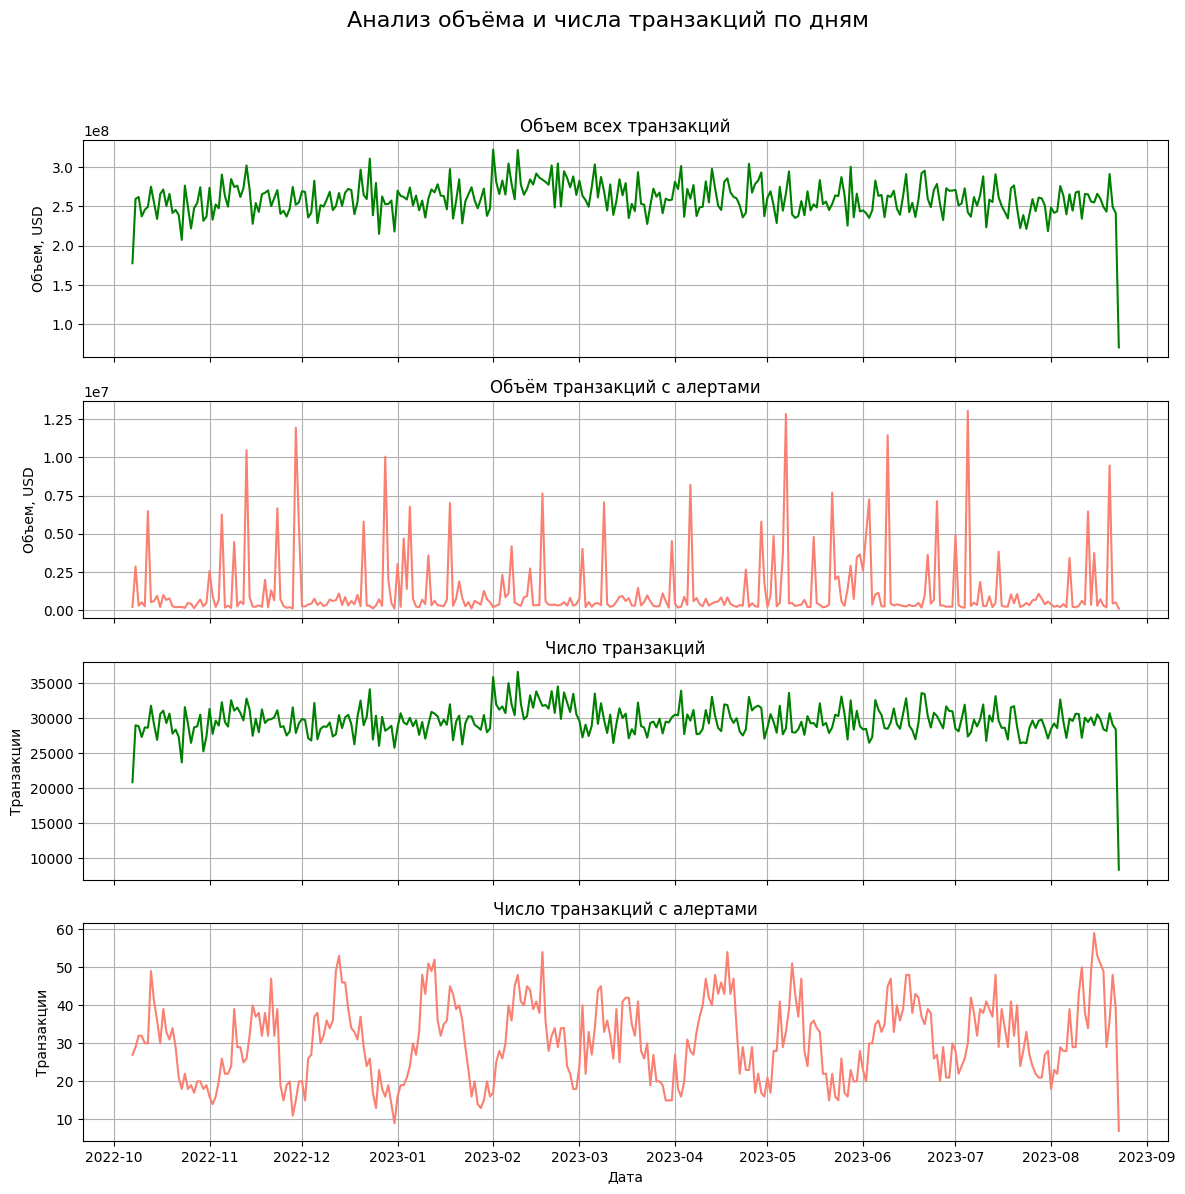

In [24]:
# –°–æ–∑–¥–∞—ë–º –∫–æ–ª–æ–Ω–∫—É —Å —Å—É–º–º–æ–π –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π
df['Suspicious_amount'] = df['Amount'] * df['Is_laundering']

# –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –ø–æ –¥–Ω—é (Date —É–∂–µ –±–µ–∑ –≤—Ä–µ–º–µ–Ω–∏)
daily = df.groupby('Date').agg(
    total_amount=('Amount', 'sum'),
    transaction_count=('Amount', 'count'),
    suspicious_count=('Is_laundering', 'sum'),
    suspicious_amount=('Suspicious_amount', 'sum')
)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤
fig, axes = plt.subplots(4, 1, figsize=(14, 13), sharex=True)

# 1. –°—É–º–º–∞ –≤—Å–µ—Ö –ø–µ—Ä–µ–≤–æ–¥–æ–≤
axes[0].plot(daily.index, daily['total_amount'], color='green')
axes[0].set_title('–û–±—ä–µ–º –≤—Å–µ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π')
axes[0].set_ylabel('–û–±—ä–µ–º, USD')
axes[0].grid(True)

# 4. –°—É–º–º–∞ –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–≤–æ–¥–æ–≤ —Å –∞–ª–µ—Ä—Ç–∞–º–∏
axes[1].plot(daily.index, daily['suspicious_amount'], color='salmon')
axes[1].set_title('–û–±—ä—ë–º —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å –∞–ª–µ—Ä—Ç–∞–º–∏')
axes[1].set_ylabel('–û–±—ä–µ–º, USD')
axes[1].grid(True)

# 2. –ö–æ–ª-–≤–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π
axes[2].plot(daily.index, daily['transaction_count'], color='green')
axes[2].set_title('–ß–∏—Å–ª–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π')
axes[2].set_ylabel('–¢—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏')
axes[2].grid(True)

# 3. –ö–æ–ª-–≤–æ –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π
axes[3].plot(daily.index, daily['suspicious_count'], color='salmon')
axes[3].set_title('–ß–∏—Å–ª–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å –∞–ª–µ—Ä—Ç–∞–º–∏')
axes[3].set_ylabel('–¢—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏')
axes[3].grid(True)

# –û–±—â–∞—è –Ω–∞—Å—Ç—Ä–æ–π–∫–∞
plt.xlabel('–î–∞—Ç–∞')
plt.suptitle('–ê–Ω–∞–ª–∏–∑ –æ–±—ä—ë–º–∞ –∏ —á–∏—Å–ª–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –ø–æ –¥–Ω—è–º', fontsize=16)
plt.show()

### 1.3 –í–∞–ª—é—Ç–∞

**–¢–∞–±–ª–∏—Ü–∞ –¥–æ–ª–µ–π –≤–∞–ª—é—Ç –æ—Ç–ø—Ä–∞–≤–∫–∏ –∏ –ø–æ–ª—É—á–µ–Ω–∏—è**

In [25]:
send_currency = df["Payment_currency_iso"].value_counts(normalize=True).round(4) * 100
receive_currency = df["Received_currency_iso"].value_counts(normalize=True).round(4) * 100

currency_table = pd.DataFrame({
    "–í–∞–ª—é—Ç–∞": sorted(set(send_currency.index).union(set(receive_currency.index)))
})
currency_table["–û—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è, %"] = currency_table["–í–∞–ª—é—Ç–∞"].map(send_currency).fillna(0)
currency_table["–ü–æ–ª—É—á–µ–Ω–∏—è, %"] = currency_table["–í–∞–ª—é—Ç–∞"].map(receive_currency).fillna(0)

currency_table["Max (%)"] = currency_table[["–û—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è, %", "–ü–æ–ª—É—á–µ–Ω–∏—è, %"]].max(axis=1)

currency_table = currency_table.sort_values(by="Max (%)", ascending=False).reset_index(drop=True)

currency_table.drop(columns="Max (%)", inplace=True)

print("–¢–∞–±–ª–∏—Ü–∞ –¥–æ–ª–µ–π –≤–∞–ª—é—Ç –æ—Ç–ø—Ä–∞–≤–∫–∏ –∏ –ø–æ–ª—É—á–µ–Ω–∏—è")
display(currency_table)

–¢–∞–±–ª–∏—Ü–∞ –¥–æ–ª–µ–π –≤–∞–ª—é—Ç –æ—Ç–ø—Ä–∞–≤–∫–∏ –∏ –ø–æ–ª—É—á–µ–Ω–∏—è


–í–∞–ª—é—Ç–∞  –û—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è, %  –ü–æ–ª—É—á–µ–Ω–∏—è, %
0     GBP           95.73         92.41
1     EUR            1.23          2.44
2     ALL            0.26          0.48
3     MAD            0.27          0.48
4     JPY            0.27          0.48
5     MXN            0.26          0.48
6     PKR            0.29          0.48
7     NGN            0.29          0.47
8     INR            0.26          0.46
9     USD            0.27          0.46
10    AED            0.29          0.45
11    CHF            0.29          0.45
12    TRY            0.29          0.45

**–í–∞–ª—é—Ç–Ω—ã–µ –ø–∞—Ä—ã (–æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏–µ -> –ø–æ–ª—É—á–µ–Ω–∏–µ)**

In [26]:
currency_pairs = (
    df.groupby(["Payment_currency_iso", "Received_currency_iso"])
    .size()
    .reset_index(name="–ß–∏—Å–ª–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π")
)

currency_pairs["–î–æ–ª—è, %"] = (currency_pairs["–ß–∏—Å–ª–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π"] / currency_pairs["–ß–∏—Å–ª–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π"].sum() * 100).round(2)

currency_pairs = currency_pairs.rename(columns={
    "Payment_currency_iso": "–í–∞–ª—é—Ç–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è",
    "Received_currency_iso": "–í–∞–ª—é—Ç–∞ –ø–æ–ª—É—á–µ–Ω–∏—è"
})

currency_pairs = currency_pairs.sort_values("–î–æ–ª—è, %", ascending=False).reset_index(drop=True)

print("–¢–æ–ø 10 –≤–∞–ª—é—Ç–Ω—ã—Ö –ø–∞—Ä –ø–æ –¥–æ–ª–µ –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π")
display(currency_pairs.head(10))


–¢–æ–ø 10 –≤–∞–ª—é—Ç–Ω—ã—Ö –ø–∞—Ä –ø–æ –¥–æ–ª–µ –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π


–í–∞–ª—é—Ç–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è –í–∞–ª—é—Ç–∞ –ø–æ–ª—É—á–µ–Ω–∏—è  –ß–∏—Å–ª–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π  –î–æ–ª—è, %
0                GBP              GBP           8414112    88.52
1                GBP              EUR            220504     2.32
2                EUR              GBP            106608     1.12
3                GBP              JPY             43517     0.46
4                GBP              MAD             43461     0.46
5                GBP              PKR             43895     0.46
6                GBP              MXN             43174     0.45
7                GBP              ALL             43040     0.45
8                GBP              NGN             42696     0.45
9                GBP              INR             41719     0.44

**–•–∏—Ç–º–∞–ø –¥–ª—è –≤–∞–ª—é—Ç–Ω—ã—Ö –ø–∞—Ä**

In [27]:
total_pairs = df.groupby(["Payment_currency_iso", "Received_currency_iso"]).size().unstack(fill_value=0)

laundering_df = df[df["Is_laundering"] == 1]
laundering_pairs = laundering_df.groupby(["Payment_currency_iso", "Received_currency_iso"]).size().unstack(fill_value=0)

laundering_share = (laundering_pairs / total_pairs).fillna(0).round(4)

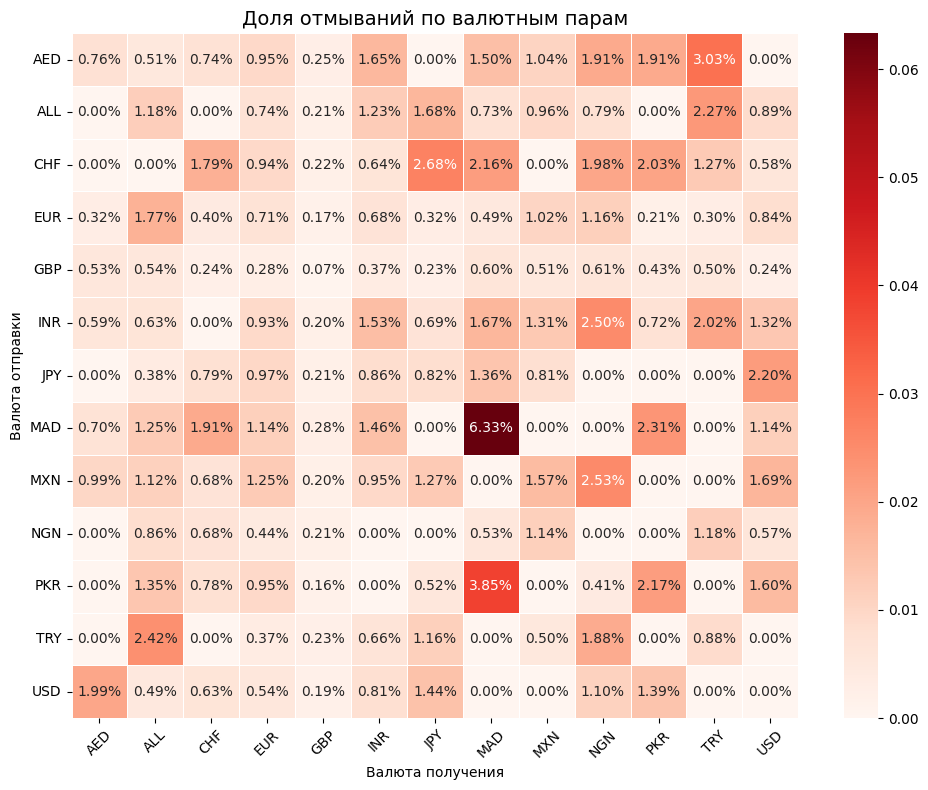

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(laundering_share, annot=True, fmt=".2%", cmap="Reds", linewidths=0.5)

plt.title("–î–æ–ª—è –æ—Ç–º—ã–≤–∞–Ω–∏–π –ø–æ –≤–∞–ª—é—Ç–Ω—ã–º –ø–∞—Ä–∞–º", fontsize=14)
plt.xlabel("–í–∞–ª—é—Ç–∞ –ø–æ–ª—É—á–µ–Ω–∏—è")
plt.ylabel("–í–∞–ª—é—Ç–∞ –æ—Ç–ø—Ä–∞–≤–∫–∏")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 1.4 –ì–µ–æ–≥—Ä–∞—Ñ–∏—è —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π

**–ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ —Å—Ç—Ä–∞–Ω, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç —Ç–æ–ª—å–∫–æ –ø–æ–ª—É—á–∞—Ç–µ–ª–∏ –∏–ª–∏ —Ç–æ–ª—å–∫–æ –æ—Ç–ø—Ä–∞–≤–∏—Ç–µ–ª–∏**

In [29]:
senders = set(df["Sender_bank_location"].unique())
receivers = set(df["Receiver_bank_location"].unique())

only_senders = sorted(senders - receivers)

only_receivers = sorted(receivers - senders)

if not only_senders and not only_receivers:
    print("‚ùó–í—Å–µ —Å—Ç—Ä–∞–Ω—ã —É—á–∞—Å—Ç–≤—É—é—Ç –∫–∞–∫ –≤ –∏—Å—Ö–æ–¥—è—â–∏—Ö, —Ç–∞–∫ –∏ –≤–æ –≤—Ö–æ–¥—è—â–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏—è—Ö")
else:
    if only_senders:
        print("‚ùó–°—Ç—Ä–∞–Ω—ã, –∫–æ—Ç–æ—Ä—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ç–æ–ª—å–∫–æ –∫–∞–∫ –æ—Ç–ø—Ä–∞–≤–∏—Ç–µ–ª–∏")
        for country in only_senders:
            print("-", country)
    else:
        print("‚ùó–ù–µ—Ç —Å—Ç—Ä–∞–Ω, –∫–æ—Ç–æ—Ä—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ç–æ–ª—å–∫–æ –∫–∞–∫ –æ—Ç–ø—Ä–∞–≤–∏—Ç–µ–ª–∏")
    
    if only_receivers:
        print("\n–°—Ç—Ä–∞–Ω—ã, –∫–æ—Ç–æ—Ä—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ç–æ–ª—å–∫–æ –∫–∞–∫ –ø–æ–ª—É—á–∞—Ç–µ–ª–∏")
        for country in only_receivers:
            print("-", country)
    else:
        print("‚ùó–ù–µ—Ç —Å—Ç—Ä–∞–Ω, –∫–æ—Ç–æ—Ä—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ç–æ–ª—å–∫–æ –∫–∞–∫ –ø–æ–ª—É—á–∞—Ç–µ–ª–∏")

‚ùó–í—Å–µ —Å—Ç—Ä–∞–Ω—ã —É—á–∞—Å—Ç–≤—É—é—Ç –∫–∞–∫ –≤ –∏—Å—Ö–æ–¥—è—â–∏—Ö, —Ç–∞–∫ –∏ –≤–æ –≤—Ö–æ–¥—è—â–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏—è—Ö


**–ë–∞—Ä–ø–ª–æ—Ç—ã –¥–ª—è –¥–æ–ª–µ–π –æ—Ç –æ–±—â–µ–≥–æ –æ–±—ä–µ–º–∞ –∏—Å—Ö–æ–¥—è—â–∏—Ö –∏ –≤—Ö–æ–¥—è—â–∏—Ö –ø–µ—Ä–µ–≤–æ–¥–æ–≤ –ø–æ —Å—Ç—Ä–∞–Ω–∞–º**

In [30]:
sender_volume = df.groupby('Sender_bank_location')['Amount'].sum().sort_values(ascending=False)
receiver_volume = df.groupby('Receiver_bank_location')['Amount'].sum().sort_values(ascending=False)

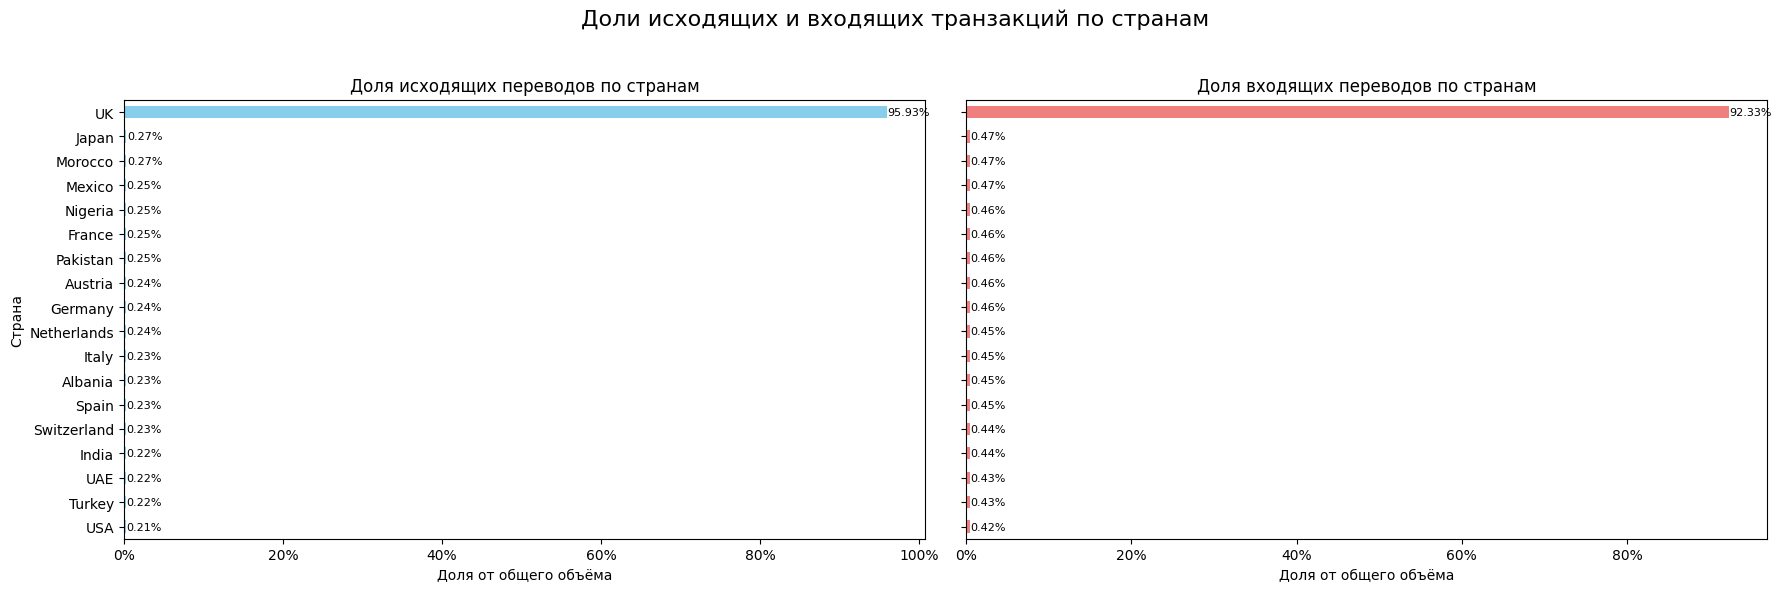

In [31]:
sender_volume = df.groupby('Sender_bank_location')['Amount'].sum()
receiver_volume = df.groupby('Receiver_bank_location')['Amount'].sum()

sender_share = (sender_volume / sender_volume.sum()).sort_values(ascending=False)
receiver_share = (receiver_volume / receiver_volume.sum()).sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, max(6, len(sender_share) * 0.3)), sharey=True)

sender_share.sort_values().plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('–î–æ–ª—è –∏—Å—Ö–æ–¥—è—â–∏—Ö –ø–µ—Ä–µ–≤–æ–¥–æ–≤ –ø–æ —Å—Ç—Ä–∞–Ω–∞–º')
axes[0].set_xlabel('–î–æ–ª—è –æ—Ç –æ–±—â–µ–≥–æ –æ–±—ä—ë–º–∞')
axes[0].set_ylabel('–°—Ç—Ä–∞–Ω–∞')
axes[0].xaxis.set_major_formatter(lambda x, _: f"{x:.0%}")

for i, (country, val) in enumerate(sender_share.sort_values().items()):
    axes[0].text(val + 0.001, i, f"{val:.2%}", va='center', fontsize=8)

receiver_share_sorted = receiver_share.sort_values()
receiver_share_sorted.plot(kind='barh', ax=axes[1], color='lightcoral')
axes[1].set_title('–î–æ–ª—è –≤—Ö–æ–¥—è—â–∏—Ö –ø–µ—Ä–µ–≤–æ–¥–æ–≤ –ø–æ —Å—Ç—Ä–∞–Ω–∞–º')
axes[1].set_xlabel('–î–æ–ª—è –æ—Ç –æ–±—â–µ–≥–æ –æ–±—ä—ë–º–∞')
axes[1].set_ylabel('–°—Ç—Ä–∞–Ω–∞')
axes[1].xaxis.set_major_formatter(lambda x, _: f"{x:.0%}")

for i, (country, val) in enumerate(receiver_share_sorted.items()):
    axes[1].text(val + 0.001, i, f"{val:.2%}", va='center', fontsize=8)

plt.suptitle('–î–æ–ª–∏ –∏—Å—Ö–æ–¥—è—â–∏—Ö –∏ –≤—Ö–æ–¥—è—â–∏—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –ø–æ —Å—Ç—Ä–∞–Ω–∞–º', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**–¢–∞–±–ª–∏—Ü–∞ –¥–æ–ª–µ–π –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∏—Å—Ö–æ–¥—è—â–∏—Ö –∏ –≤—Ö–æ–¥—è—â–∏—Ö –ø–µ—Ä–µ–≤–æ–¥–æ–≤ –ø–æ —Å—Ç—Ä–∞–Ω–∞–º**

In [32]:
# –ü–æ–¥—Å—á—ë—Ç –¥–æ–ª–µ–π –ø–æ —Å—Ç—Ä–∞–Ω–∞–º –æ—Ç–ø—Ä–∞–≤–∏—Ç–µ–ª–µ–π –∏ –ø–æ–ª—É—á–∞—Ç–µ–ª–µ–π
send_geo = df["Sender_bank_location"].value_counts(normalize=True).round(4) * 100
receive_geo = df["Receiver_bank_location"].value_counts(normalize=True).round(4) * 100

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –≤ —Ç–∞–±–ª–∏—Ü—É
geo_table = pd.DataFrame({
    "–°—Ç—Ä–∞–Ω–∞": sorted(set(send_geo.index).union(set(receive_geo.index)))
})
geo_table["–û—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è, %"] = geo_table["–°—Ç—Ä–∞–Ω–∞"].map(send_geo).fillna(0)
geo_table["–ü–æ–ª—É—á–µ–Ω–∏—è, %"] = geo_table["–°—Ç—Ä–∞–Ω–∞"].map(receive_geo).fillna(0)

# –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ –ø–æ –Ω–∞–∏–±–æ–ª—å—à–µ–º—É –∑–Ω–∞—á–µ–Ω–∏—é
geo_table["–ú–∞–∫—Å–∏–º—É–º (%)"] = geo_table[["–û—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è, %", "–ü–æ–ª—É—á–µ–Ω–∏—è, %"]].max(axis=1)
geo_table = geo_table.sort_values("–ú–∞–∫—Å–∏–º—É–º (%)", ascending=False).drop(columns="–ú–∞–∫—Å–∏–º—É–º (%)").reset_index(drop=True)

# –í—ã–≤–æ–¥
print("‚ùó –ì–µ–æ–≥—Ä–∞—Ñ–∏—è –±–∞–Ω–∫–æ–≤ –æ—Ç–ø—Ä–∞–≤–∏—Ç–µ–ª–µ–π –∏ –ø–æ–ª—É—á–∞—Ç–µ–ª–µ–π")
display(geo_table)

‚ùó –ì–µ–æ–≥—Ä–∞—Ñ–∏—è –±–∞–Ω–∫–æ–≤ –æ—Ç–ø—Ä–∞–≤–∏—Ç–µ–ª–µ–π –∏ –ø–æ–ª—É—á–∞—Ç–µ–ª–µ–π


–°—Ç—Ä–∞–Ω–∞  –û—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è, %  –ü–æ–ª—É—á–µ–Ω–∏—è, %
0            UK           96.61         93.26
1       Albania            0.19          0.41
2       Austria            0.19          0.41
3        France            0.20          0.41
4       Morocco            0.19          0.41
5       Germany            0.20          0.41
6      Pakistan            0.21          0.41
7         Japan            0.19          0.41
8        Mexico            0.19          0.40
9       Nigeria            0.21          0.40
10          USA            0.20          0.39
11  Netherlands            0.18          0.39
12        India            0.19          0.39
13        Spain            0.20          0.39
14        Italy            0.20          0.38
15  Switzerland            0.22          0.38
16          UAE            0.21          0.38
17       Turkey            0.22          0.37

**–•–∏—Ç–º–∞–ø –¥–ª—è –ø–∞—Ä —Å—Ç—Ä–∞–Ω**

In [33]:
same_country = (df["Sender_bank_location"] == df["Receiver_bank_location"])
same_percent = same_country.mean().round(4) * 100
print(f"‚ùó–í–Ω—É—Ç—Ä–µ–Ω–Ω–∏–µ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏: {round(same_percent, 2)}%")

‚ùó–í–Ω—É—Ç—Ä–µ–Ω–Ω–∏–µ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏: 90.17%


In [34]:
total_geo = df.groupby(["Sender_bank_location", "Receiver_bank_location"]).size().unstack(fill_value=0)
laundering_df = df[df["Is_laundering"] == 1]
laundering_geo = laundering_df.groupby(["Sender_bank_location", "Receiver_bank_location"]).size().unstack(fill_value=0)
laundering_share_geo = (laundering_geo / total_geo).fillna(0).round(4)

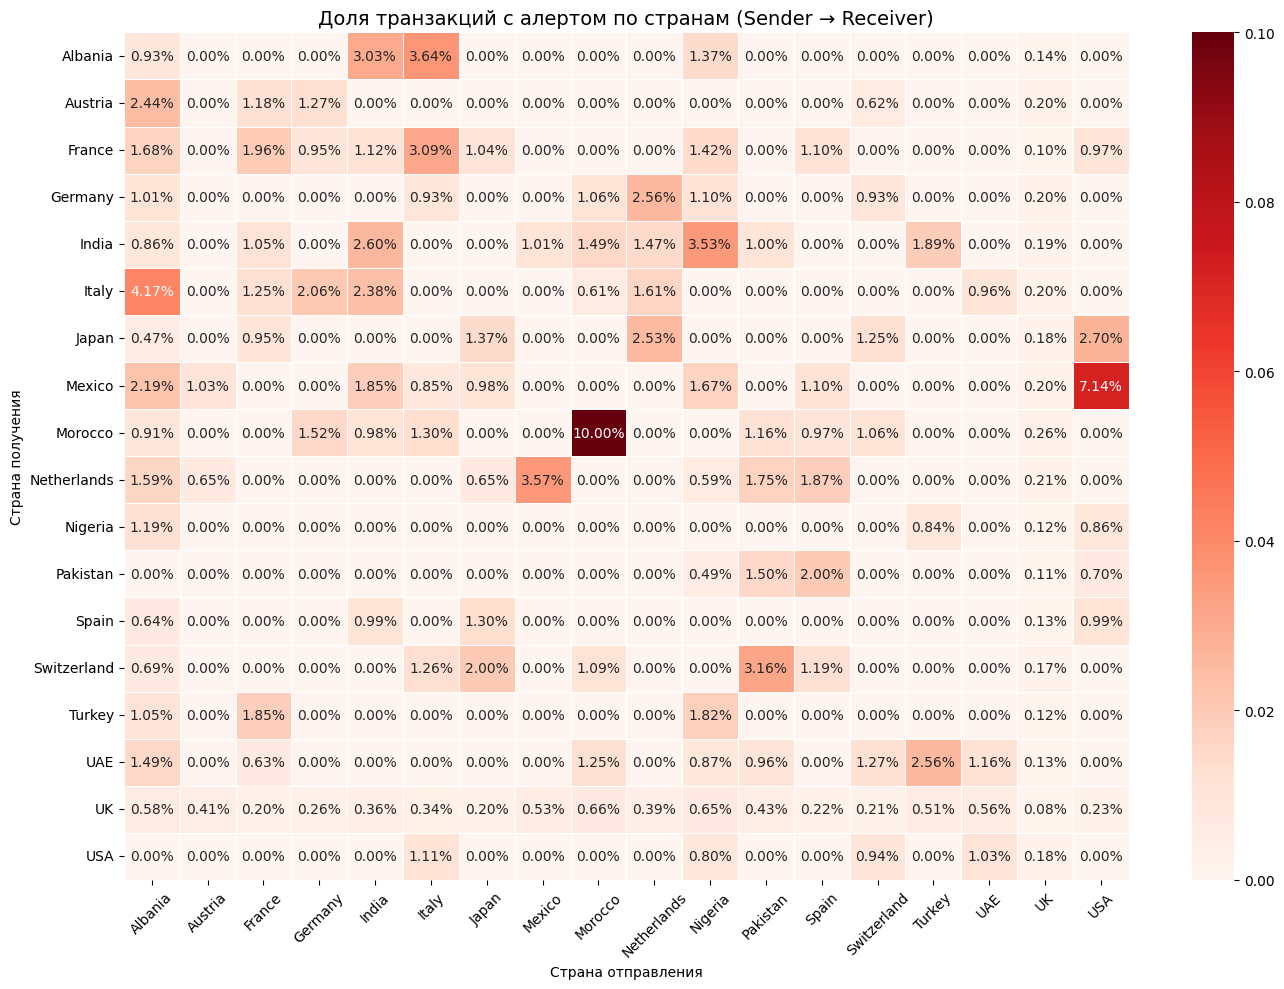

In [35]:
plt.figure(figsize=(14, 10))
sns.heatmap(laundering_share_geo, annot=True, fmt=".2%", cmap="Reds", linewidths=0.5)

plt.title("–î–æ–ª—è —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å –∞–ª–µ—Ä—Ç–æ–º –ø–æ —Å—Ç—Ä–∞–Ω–∞–º (Sender ‚Üí Receiver)", fontsize=14)
plt.xlabel("–°—Ç—Ä–∞–Ω–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏—è")
plt.ylabel("–°—Ç—Ä–∞–Ω–∞ –ø–æ–ª—É—á–µ–Ω–∏—è")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 1.5 –û–±—ä–µ–º —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π

_–í—Å–µ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏_

**–ì—Ä–∞—Ñ–∏–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ–±—ä–µ–º–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π (–æ–±—ã—á–Ω–æ–µ –∏ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–µ)**

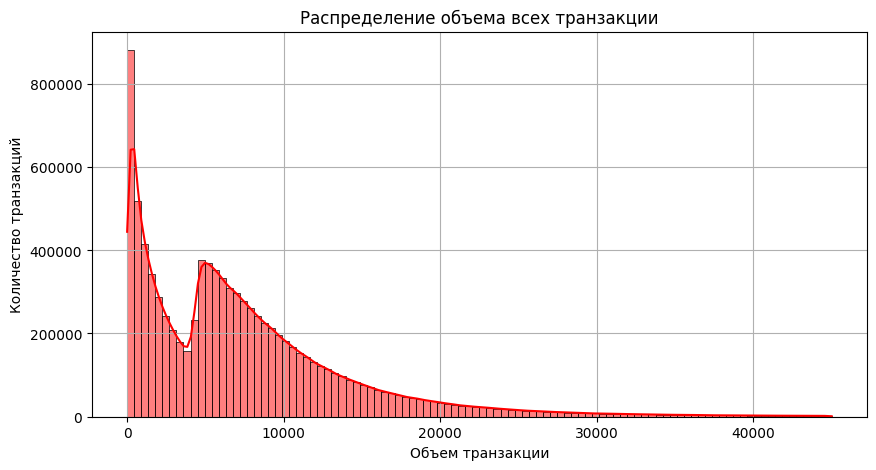

In [36]:
upper_bound = df["Amount"].quantile(0.99)

plt.figure(figsize=(10, 5))
sns.histplot(df[df["Amount"] <= upper_bound]["Amount"],
             bins=100, kde=True, color="red")

plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–±—ä–µ–º–∞ –≤—Å–µ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏")
plt.xlabel("–û–±—ä–µ–º —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π")
plt.grid()
plt.show()

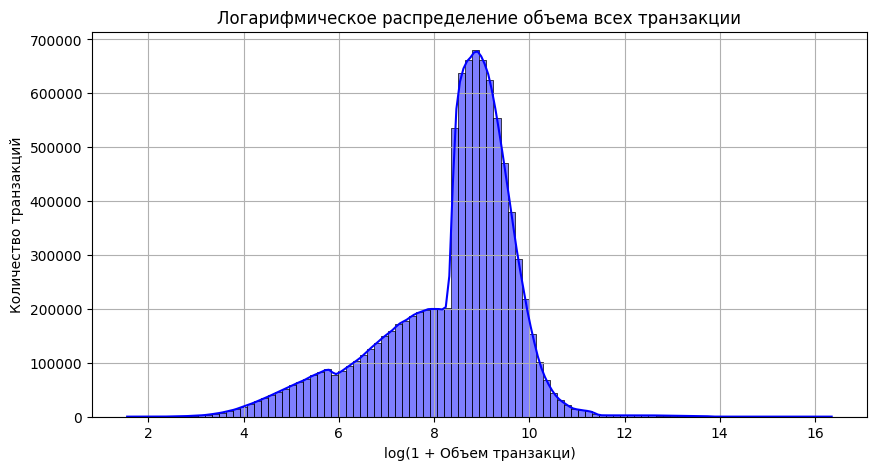

In [37]:
df["log_amount"] = np.log1p(df["Amount"])

plt.figure(figsize=(10, 5))
sns.histplot(df["log_amount"], bins=100, kde=True, color="blue")
plt.title("–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–±—ä–µ–º–∞ –≤—Å–µ—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏")
plt.xlabel("log(1 + –û–±—ä–µ–º —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏)")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π")
plt.grid()
plt.show()

*–¢—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ —Å –∞–ª–µ—Ä—Ç–æ–º*

**–ì—Ä–∞—Ñ–∏–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ–±—ä–µ–º–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å –∞–ª–µ—Ä—Ç–æ–º (–æ–±—ã—á–Ω–æ–µ –∏ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–µ)**

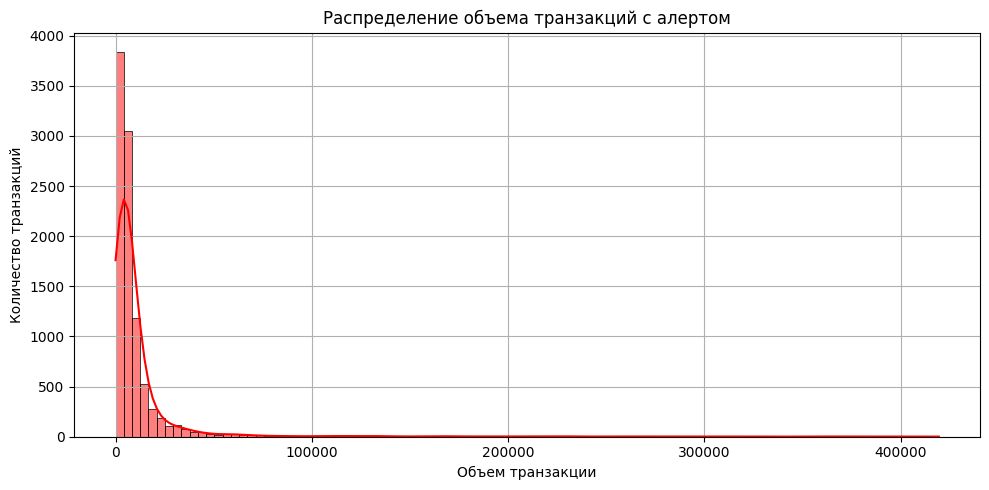

In [38]:
laundering_df = df[df["Is_laundering"] == 1]

upper_bound_laundering = laundering_df["Amount"].quantile(0.99)

plt.figure(figsize=(10, 5))
sns.histplot(
    laundering_df[laundering_df["Amount"] <= upper_bound_laundering]["Amount"],
    bins=100,
    kde=True,
    color="red"
)

plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–±—ä–µ–º–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å –∞–ª–µ—Ä—Ç–æ–º")
plt.xlabel("–û–±—ä–µ–º —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π")
plt.grid()
plt.tight_layout()
plt.show()

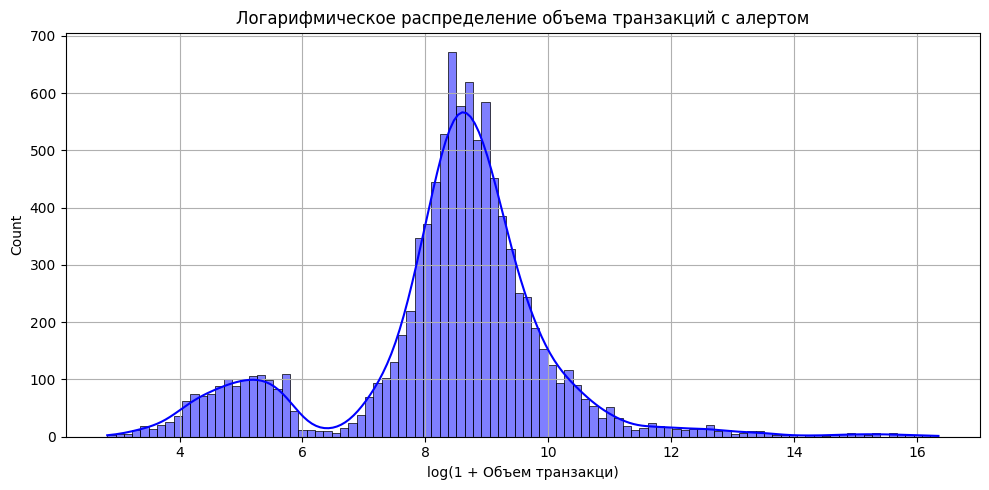

In [39]:
laundering_df = df[df["Is_laundering"] == 1].copy()
laundering_df["log_amount"] = np.log1p(laundering_df["Amount"])

plt.figure(figsize=(10, 5))
sns.histplot(laundering_df["log_amount"], bins=100, kde=True, color="blue")

plt.title("–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–±—ä–µ–º–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å –∞–ª–µ—Ä—Ç–æ–º")
plt.xlabel("log(1 + –û–±—ä–µ–º —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏)")
plt.grid()
plt.tight_layout()
plt.show()

**–ë–æ–∫—Å–ø–ª–æ—Ç –¥–ª—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –∏ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å –∞–ª–µ—Ä—Ç–æ–º**

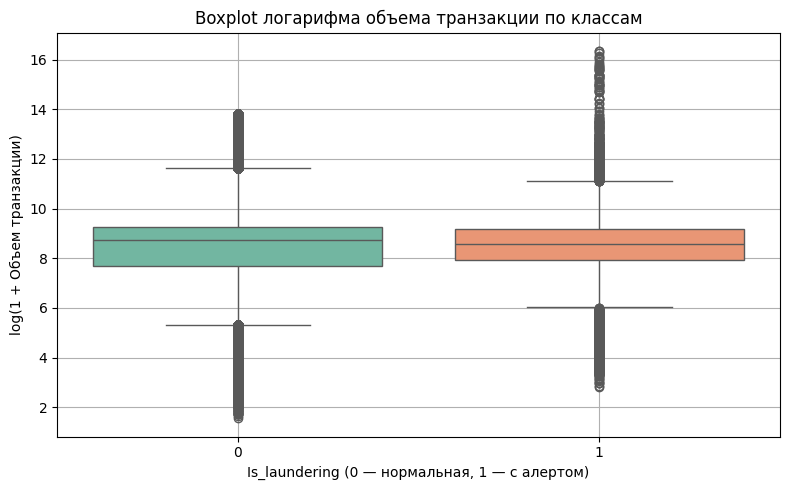

In [40]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Is_laundering", y="log_amount", palette="Set2")

plt.title("Boxplot –ª–æ–≥–∞—Ä–∏—Ñ–º–∞ –æ–±—ä–µ–º–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ –ø–æ –∫–ª–∞—Å—Å–∞–º")
plt.xlabel("Is_laundering (0 ‚Äî –Ω–æ—Ä–º–∞–ª—å–Ω–∞—è, 1 ‚Äî —Å –∞–ª–µ—Ä—Ç–æ–º)")
plt.ylabel("log(1 + –û–±—ä–µ–º —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏)")
plt.grid()
plt.tight_layout()
plt.show()

### 1.6 –ê–∫–∫–∞—É–Ω—Ç—ã

In [41]:
senders = set(df["Sender_account"].unique())
receivers = set(df["Receiver_account"].unique())

n_senders = len(senders)
n_receivers = len(receivers)
n_total_unique = len(senders.union(receivers))

only_senders = sorted(senders - receivers)
only_receivers = sorted(receivers - senders)
both_roles = sorted(senders & receivers)

n_only_senders = len(only_senders)
n_only_receivers = len(only_receivers)
n_both_roles = len(both_roles)

print("‚ùó–ê–∫–∫–∞—É–Ω—Ç—ã, –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–µ—Å—è —Ç–æ–ª—å–∫–æ –∫–∞–∫ –æ—Ç–ø—Ä–∞–≤–∏—Ç–µ–ª–∏:", n_only_senders,
      f"({n_only_senders / n_total_unique:.2%} –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∞–∫–∫–∞—É–Ω—Ç–æ–≤)")

print("\n‚ùó–ê–∫–∫–∞—É–Ω—Ç—ã, –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–µ—Å—è —Ç–æ–ª—å–∫–æ –∫–∞–∫ –ø–æ–ª—É—á–∞—Ç–µ–ª–∏:", n_only_receivers,
      f"({n_only_receivers / n_total_unique:.2%} –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∞–∫–∫–∞—É–Ω—Ç–æ–≤)")

print("\n‚ùó–ê–∫–∫–∞—É–Ω—Ç—ã —Å –¥–≤–æ–π–Ω–æ–π —Ä–æ–ª—å—é (–∏ –æ—Ç–ø—Ä–∞–≤–∏—Ç–µ–ª—å, –∏ –ø–æ–ª—É—á–∞—Ç–µ–ª—å):", n_both_roles,
      f"({n_both_roles / n_total_unique:.2%} –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∞–∫–∫–∞—É–Ω—Ç–æ–≤)")

‚ùó–ê–∫–∫–∞—É–Ω—Ç—ã, –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–µ—Å—è —Ç–æ–ª—å–∫–æ –∫–∞–∫ –æ—Ç–ø—Ä–∞–≤–∏—Ç–µ–ª–∏: 203194 (23.75% –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∞–∫–∫–∞—É–Ω—Ç–æ–≤)

‚ùó–ê–∫–∫–∞—É–Ω—Ç—ã, –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–µ—Å—è —Ç–æ–ª—å–∫–æ –∫–∞–∫ –ø–æ–ª—É—á–∞—Ç–µ–ª–∏: 562745 (65.78% –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∞–∫–∫–∞—É–Ω—Ç–æ–≤)

‚ùó–ê–∫–∫–∞—É–Ω—Ç—ã —Å –¥–≤–æ–π–Ω–æ–π —Ä–æ–ª—å—é (–∏ –æ—Ç–ø—Ä–∞–≤–∏—Ç–µ–ª—å, –∏ –ø–æ–ª—É—á–∞—Ç–µ–ª—å): 89521 (10.46% –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∞–∫–∫–∞—É–Ω—Ç–æ–≤)


**–ë–∞—Ä–ø–ª–æ—Ç —Å–∞–º—ã—Ö –∞–∫—Ç–∏–≤–Ω—ã—Ö –∞–∫–∫–∞—É–Ω—Ç–æ–≤ –ø–æ–ª—É—á–∞—Ç–µ–ª–µ–π –∏ –æ—Ç–ø—Ä–∞–≤–∏—Ç–µ–ª–µ–π —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å –∞–ª–µ—Ä—Ç–∞–º–∏**

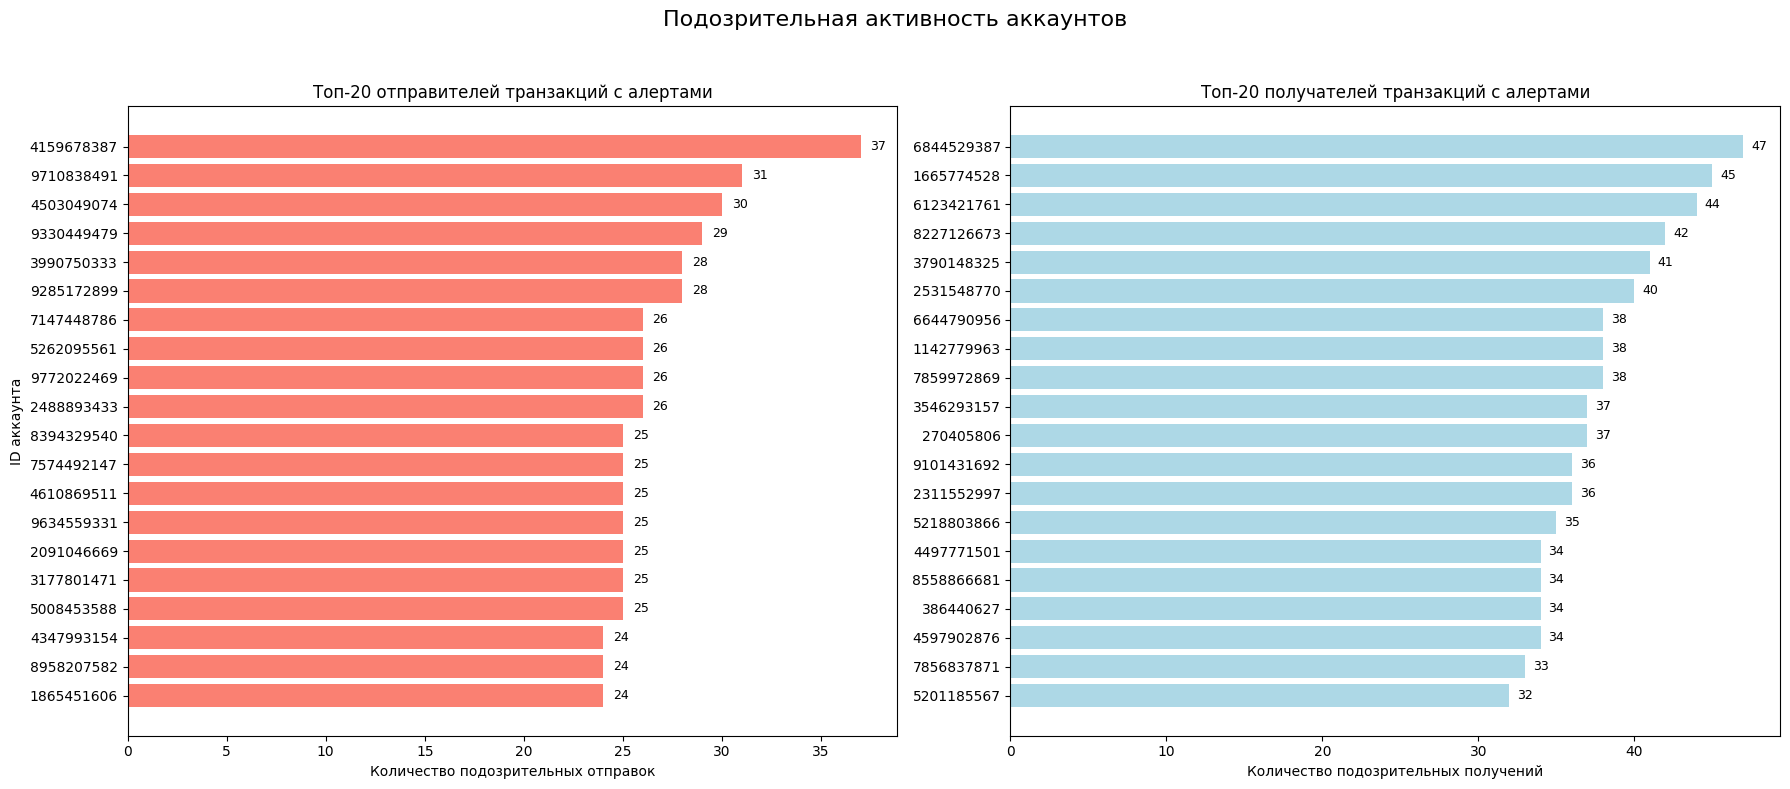

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# –ê–Ω–∞–ª–∏–∑ –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –∞–∫–∫–∞—É–Ω—Ç–æ–≤
laundering_senders = df[df['Is_laundering'] == 1]['Sender_account'].value_counts()
laundering_receivers = df[df['Is_laundering'] == 1]['Receiver_account'].value_counts()
total_senders = df['Sender_account'].value_counts()
total_receivers = df['Receiver_account'].value_counts()

laundering_activity = pd.DataFrame({
    'laundering_sent': laundering_senders,
    'total_sent': total_senders,
    'laundering_received': laundering_receivers,
    'total_received': total_receivers
}).fillna(0)

laundering_activity['sent_suspicious_rate'] = laundering_activity['laundering_sent'] / laundering_activity['total_sent']
laundering_activity['recv_suspicious_rate'] = laundering_activity['laundering_received'] / laundering_activity['total_received']
laundering_activity['any_laundering'] = (laundering_activity['laundering_sent'] > 0) | (laundering_activity['laundering_received'] > 0)

top_laundering_senders = laundering_activity['laundering_sent'].sort_values(ascending=False).head(20)
top_laundering_receivers = laundering_activity['laundering_received'].sort_values(ascending=False).head(20)

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=False)

# –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞
top_laundering_senders_sorted = top_laundering_senders.sort_values()
top_laundering_receivers_sorted = top_laundering_receivers.sort_values()

# 1. –û—Ç–ø—Ä–∞–≤–∏—Ç–µ–ª–∏
axes[0].barh(top_laundering_senders_sorted.index.astype(str), top_laundering_senders_sorted.values, color='salmon')
axes[0].set_title('–¢–æ–ø-20 –æ—Ç–ø—Ä–∞–≤–∏—Ç–µ–ª–µ–π —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å –∞–ª–µ—Ä—Ç–∞–º–∏')
axes[0].set_xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–ø—Ä–∞–≤–æ–∫')
axes[0].set_ylabel('ID –∞–∫–∫–∞—É–Ω—Ç–∞')
for i, v in enumerate(top_laundering_senders_sorted.values):
    axes[0].text(v + 0.5, i, str(int(v)), va='center', fontsize=9)

# 2. –ü–æ–ª—É—á–∞—Ç–µ–ª–∏
axes[1].barh(top_laundering_receivers_sorted.index.astype(str), top_laundering_receivers_sorted.values, color='lightblue')
axes[1].set_title('–¢–æ–ø-20 –ø–æ–ª—É—á–∞—Ç–µ–ª–µ–π —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å –∞–ª–µ—Ä—Ç–∞–º–∏')
axes[1].set_xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –ø–æ–ª—É—á–µ–Ω–∏–π')
for i, v in enumerate(top_laundering_receivers_sorted.values):
    axes[1].text(v + 0.5, i, str(int(v)), va='center', fontsize=9)

plt.suptitle('–ü–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω–∞—è –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –∞–∫–∫–∞—É–Ω—Ç–æ–≤', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### 1.7 –¢–∏–ø –ø–ª–∞—Ç–µ–∂–∞

**–î–æ–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–∏–ø–∞ –ø–ª–∞—Ç–µ–∂–µ–π –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞**

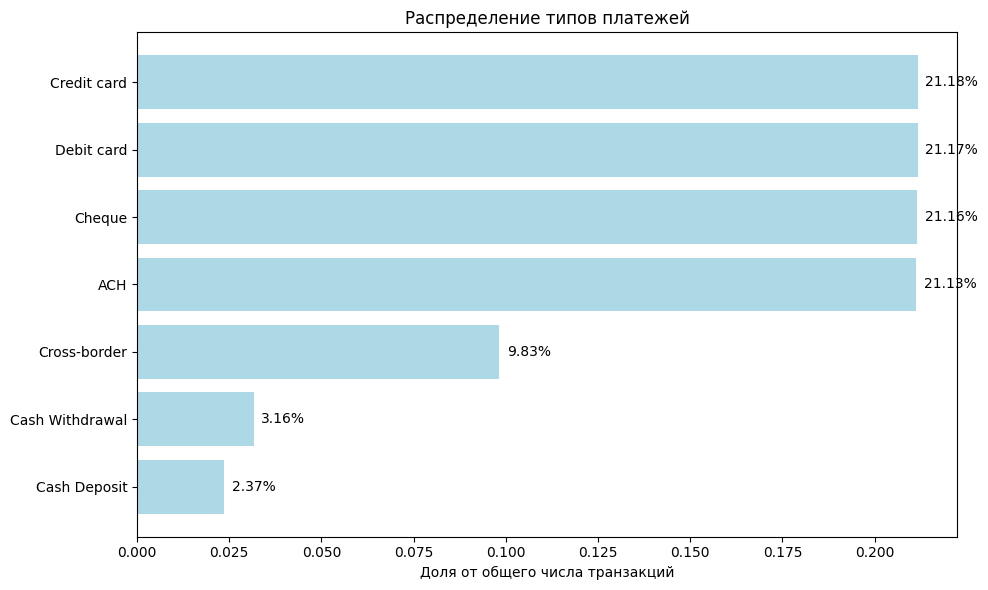

In [43]:
payment_type_counts = df['Payment_type'].value_counts(normalize=True).sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(payment_type_counts.index, payment_type_counts.values, color='lightblue')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–∏–ø–æ–≤ –ø–ª–∞—Ç–µ–∂–µ–π')
plt.xlabel('–î–æ–ª—è –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π')

# –î–æ–±–∞–≤–ª—è–µ–º –ø–æ–¥–ø–∏—Å–∏ –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height() / 2,
             f"{width:.2%}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

**–î–æ–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–∏–ø–∞ –ø–ª–∞—Ç–µ–∂–∞ —Å—Ä–µ–¥–∏ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Å –∞–ª–µ—Ä—Ç–∞–º–∏**

In [44]:
payment_laundering_stats = df.groupby('Payment_type')['Is_laundering'].agg(['count', 'sum'])
payment_laundering_stats['laundering_rate'] = payment_laundering_stats['sum'] / payment_laundering_stats['count']
payment_laundering_stats = payment_laundering_stats.sort_values('laundering_rate', ascending=False)

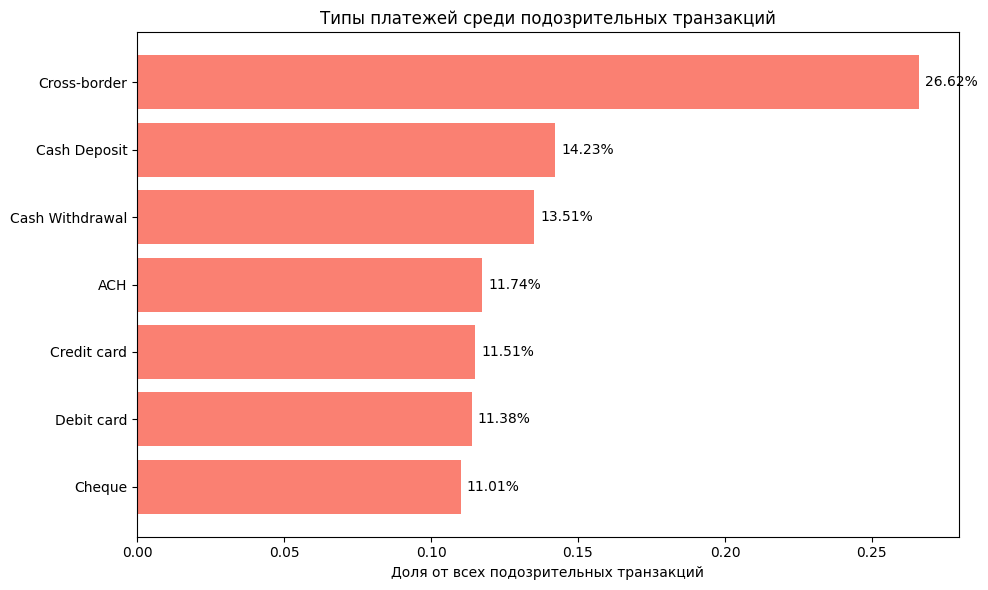

In [45]:
df_laundering = df[df['Is_laundering'] == 1]

laundering_type_share = df_laundering['Payment_type'].value_counts(normalize=True).sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(laundering_type_share.index, laundering_type_share.values, color='salmon')
plt.title('–¢–∏–ø—ã –ø–ª–∞—Ç–µ–∂–µ–π —Å—Ä–µ–¥–∏ –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π')
plt.xlabel('–î–æ–ª—è –æ—Ç –≤—Å–µ—Ö –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height() / 2,
             f"{width:.2%}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

**–î–æ–ª—è –æ—Ç –æ–±—â–µ–≥–æ –æ–±—ä–µ–º–∞ –ø–ª–∞—Ç–µ–∂–µ–π, –ø—Ä–∏—Ö–æ–¥—è—â–∞—è—Å—è –Ω–∞ –∫–∞–∂–¥—ã–π —Ç–∏–ø —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏**

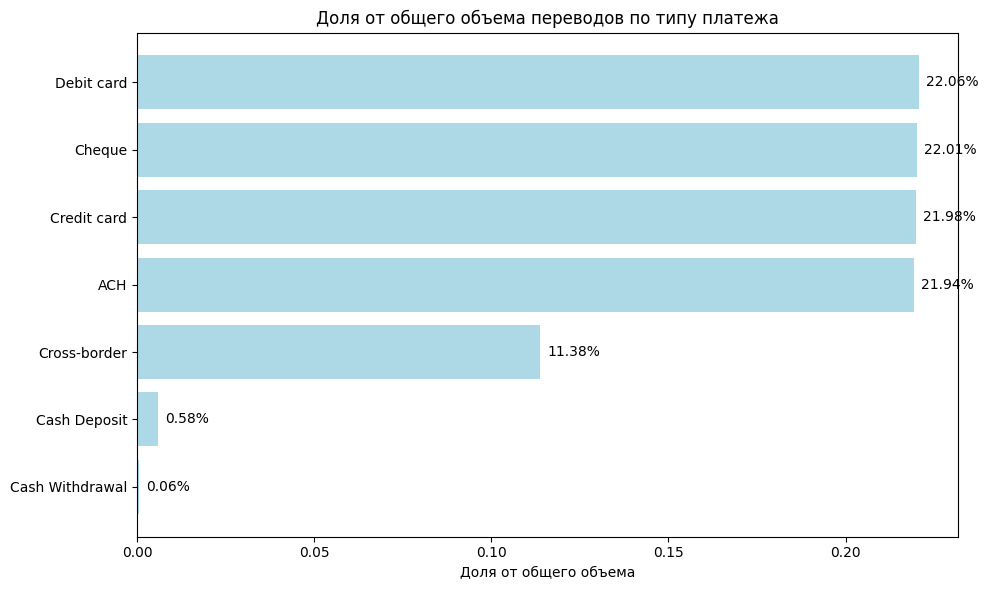

In [46]:
amount_share_by_type = df.groupby('Payment_type')['Amount'].sum()
amount_share_by_type = amount_share_by_type / amount_share_by_type.sum()
amount_share_by_type = amount_share_by_type.sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(amount_share_by_type.index, amount_share_by_type.values, color='lightblue')
plt.title('–î–æ–ª—è –æ—Ç –æ–±—â–µ–≥–æ –æ–±—ä–µ–º–∞ –ø–µ—Ä–µ–≤–æ–¥–æ–≤ –ø–æ —Ç–∏–ø—É –ø–ª–∞—Ç–µ–∂–∞')
plt.xlabel('–î–æ–ª—è –æ—Ç –æ–±—â–µ–≥–æ –æ–±—ä–µ–º–∞')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height() / 2,
             f"{width:.2%}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

**–î–æ–ª—è –æ—Ç –æ–±—ä–µ–º–∞ –ø–ª–∞—Ç–µ–∂–µ–π –ø–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏—è–º —Å –∞–ª–µ—Ä—Ç–∞–º–∏, –ø—Ä–∏—Ö–æ–¥—è—â–∞—è—Å—è –Ω–∞ –∫–∞–∂–¥—ã–π —Ç–∏–ø —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏**

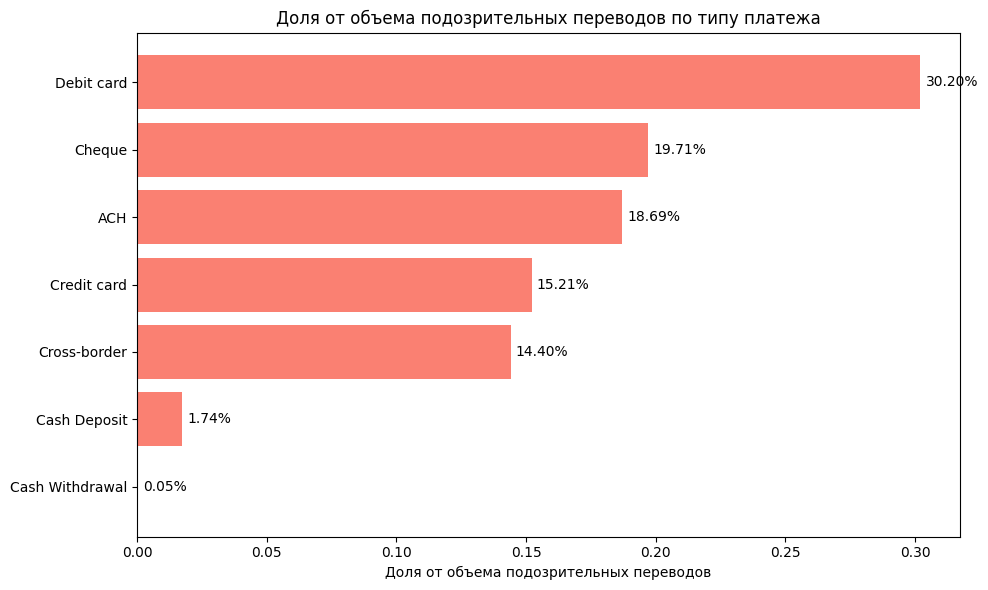

In [47]:
df_laundering = df[df['Is_laundering'] == 1]

amount_share_laundering = df_laundering.groupby('Payment_type')['Amount'].sum()
amount_share_laundering = amount_share_laundering / amount_share_laundering.sum()
amount_share_laundering = amount_share_laundering.sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(amount_share_laundering.index, amount_share_laundering.values, color='salmon')
plt.title('–î–æ–ª—è –æ—Ç –æ–±—ä–µ–º–∞ –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–≤–æ–¥–æ–≤ –ø–æ —Ç–∏–ø—É –ø–ª–∞—Ç–µ–∂–∞')
plt.xlabel('–î–æ–ª—è –æ—Ç –æ–±—ä–µ–º–∞ –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–≤–æ–¥–æ–≤')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height() / 2,
             f"{width:.2%}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

## –ß–∞—Å—Ç—å 2. –ê–Ω–∞–ª–∏–∑ –≥—Ä–∞—Ñ–∞

**–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∞**

In [46]:
MG = nx.from_pandas_edgelist(
    df,
    source='Sender_account',
    target='Receiver_account',
    edge_attr=['Amount', 'Is_laundering'],
    create_using=nx.MultiDiGraph()
)

print("‚ùó–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–∑–ª–æ–≤:", MG.number_of_nodes())
print("\n‚ùó–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä—ë–±–µ—Ä:", MG.number_of_edges())

‚ùó–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–∑–ª–æ–≤: 855460

‚ùó–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä—ë–±–µ—Ä: 9504852


In [93]:
unique_pairs = df.groupby(['Sender_account', 'Receiver_account']).size()
n_unique_pairs = unique_pairs.shape[0]

n_multi_edges = (unique_pairs > 1).sum()
share_multi = n_multi_edges / n_unique_pairs

print(f"‚ùó–ù–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–π —Å –Ω–µ–æ–¥–Ω–æ–∫—Ä–∞—Ç–Ω—ã–º–∏ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏—è–º–∏: {n_multi_edges} –∏–∑ {n_unique_pairs} "
      f"({share_multi:.2%} –æ—Ç –≤—Å–µ—Ö –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–π)")

‚ùó–ù–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–π —Å –Ω–µ–æ–¥–Ω–æ–∫—Ä–∞—Ç–Ω—ã–º–∏ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏—è–º–∏: 781631 –∏–∑ 887497 (88.07% –æ—Ç –≤—Å–µ—Ö –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–π)


In [ ]:
in_degrees = dict(MG.in_degree())
out_degrees = dict(MG.out_degree())

degree_df = pd.DataFrame({
    'in_degree': pd.Series(in_degrees),
    'out_degree': pd.Series(out_degrees)
})
degree_df['total_degree'] = degree_df['in_degree'] + degree_df['out_degree']

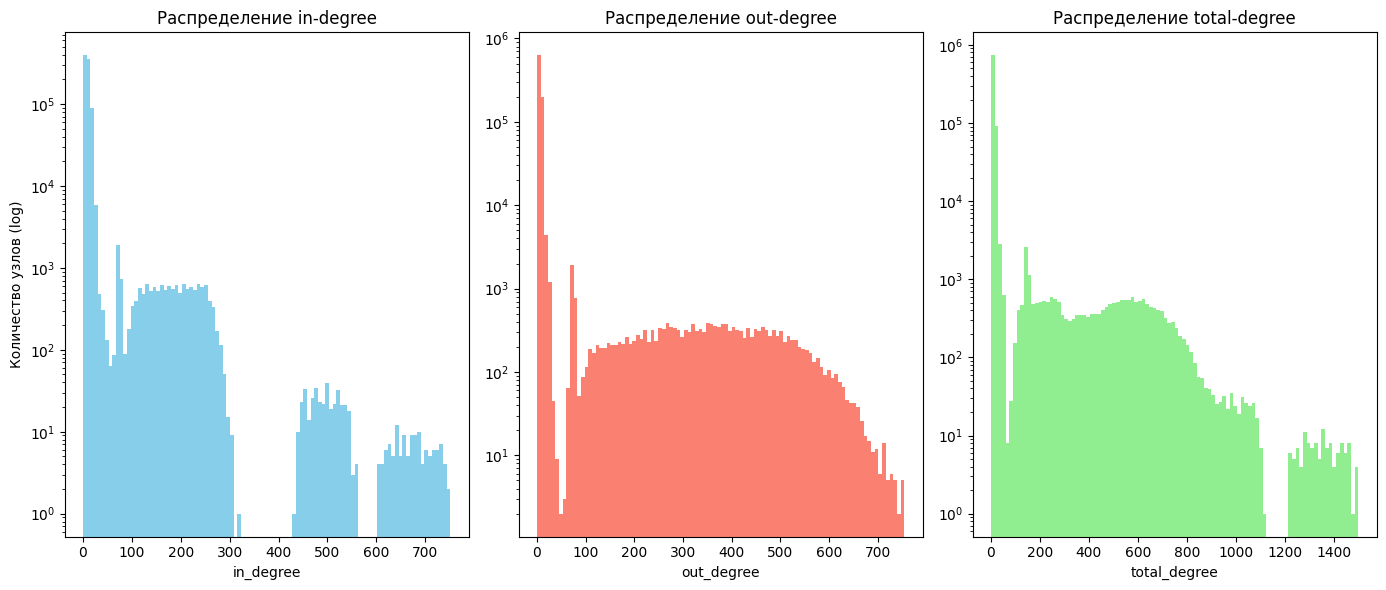

In [99]:
plt.figure(figsize=(14, 6))

# In-degree
plt.subplot(1, 3, 1)
plt.hist(degree_df['in_degree'], bins=100, log=True, color='skyblue')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ in-degree')
plt.xlabel('in_degree')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–∑–ª–æ–≤ (log)')

# Out-degree
plt.subplot(1, 3, 2)
plt.hist(degree_df['out_degree'], bins=100, log=True, color='salmon')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ out-degree')
plt.xlabel('out_degree')

# Total-degree
plt.subplot(1, 3, 3)
plt.hist(degree_df['total_degree'], bins=100, log=True, color='lightgreen')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ total-degree')
plt.xlabel('total_degree')

plt.tight_layout()
plt.show()

‚ùó–ü–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö —Ö–∞–±–æ–≤: 209 –∏–∑ 8570

‚ùó–ò–∑ —Ç–æ–ø-100 —Ö–∞–±–æ–≤ –≤ –æ—Ç–º—ã–≤–∫–µ –∑–∞–º–µ—á–µ–Ω–æ: 63 


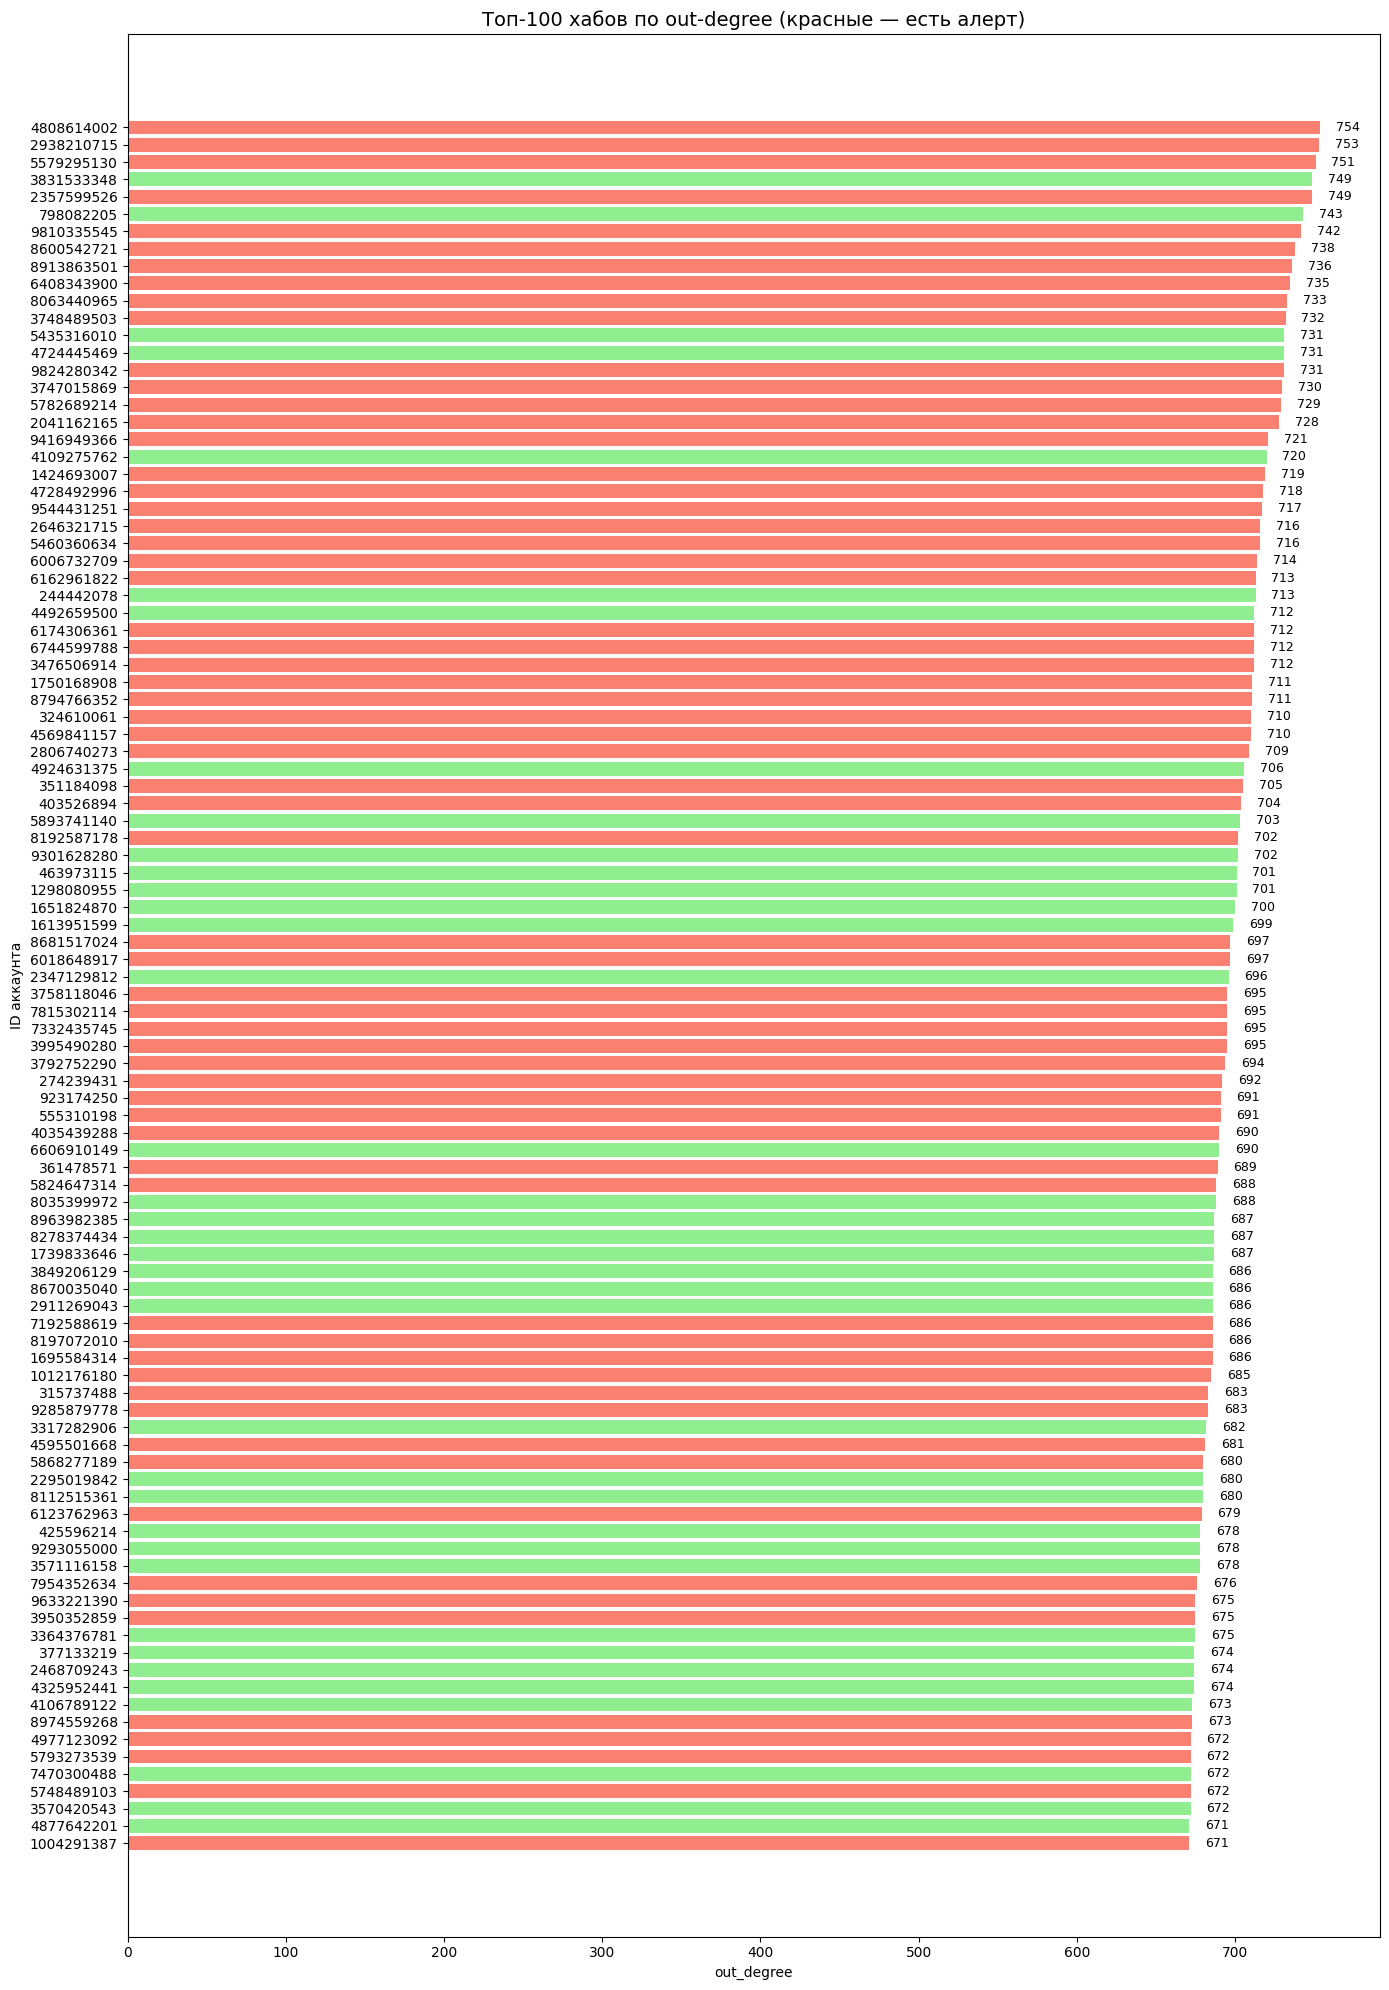

In [ ]:
threshold = degree_df['out_degree'].quantile(0.99)
degree_df['is_hub'] = degree_df['out_degree'] >= threshold

hubs_df = degree_df[degree_df['is_hub']].copy()

laundering_accounts = set(df.loc[df['Is_laundering'] == 1, 'Sender_account']) | \
                      set(df.loc[df['Is_laundering'] == 1, 'Receiver_account'])

hubs_df['laundering_flag'] = hubs_df.index.isin(laundering_accounts)

n_laundering_hubs = hubs_df['laundering_flag'].sum()
print(f"‚ùó–ü–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö —Ö–∞–±–æ–≤: {n_laundering_hubs} –∏–∑ {len(hubs_df)}")

top_hubs = hubs_df.sort_values(by='out_degree', ascending=False).head(100)
colors = top_hubs['laundering_flag'].map({True: 'salmon', False: 'lightgreen'})

n_top_laundering = top_hubs['laundering_flag'].sum()
print(f"\n‚ùó–ò–∑ —Ç–æ–ø-100 —Ö–∞–±–æ–≤ –≤ –æ—Ç–º—ã–≤–∫–µ –∑–∞–º–µ—á–µ–Ω–æ: {n_top_laundering} ")

plt.figure(figsize=(14, 20))
bars = plt.barh(top_hubs.index.astype(str), top_hubs['out_degree'], color=colors)
plt.title('–¢–æ–ø-100 —Ö–∞–±–æ–≤ –ø–æ out-degree (–∫—Ä–∞—Å–Ω—ã–µ ‚Äî –µ—Å—Ç—å –∞–ª–µ—Ä—Ç)', fontsize=14)
plt.xlabel('out_degree')
plt.ylabel('ID –∞–∫–∫–∞—É–Ω—Ç–∞')
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
             f"{int(width)}", va='center', fontsize=9)

plt.tight_layout()
plt.show()


**–°–ª–∞–±–æ —Å–≤—è–∑–Ω—ã–µ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã**

In [121]:
G_undirected = MG.to_undirected()

components = list(nx.connected_components(G_undirected))
largest_component = max(components, key=len)

print(f"‚ùó–ß–∏—Å–ª–æ —Å–ª–∞–±–æ—Å–≤—è–∑–Ω—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç: {len(components):,}")
print(f"\n‚ùó–†–∞–∑–º–µ—Ä –∫—Ä—É–ø–Ω–µ–π—à–µ–π –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã: {len(largest_component):,} —É–∑–ª–æ–≤")

‚ùó–ß–∏—Å–ª–æ —Å–ª–∞–±–æ—Å–≤—è–∑–Ω—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç: 15,592

‚ùó–†–∞–∑–º–µ—Ä –∫—Ä—É–ø–Ω–µ–π—à–µ–π –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã: 954 —É–∑–ª–æ–≤


**–°–∏–ª—å–Ω–æ —Å–≤—è–∑–Ω—ã–µ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã**

In [122]:
strong_components = list(nx.strongly_connected_components(MG))
largest_strong = max(strong_components, key=len)

print(f"‚ùó–ß–∏—Å–ª–æ —Å–∏–ª—å–Ω–æ —Å–≤—è–∑–∞–Ω–Ω—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç: {len(strong_components):,}")
print(f"\n‚ùó–†–∞–∑–º–µ—Ä –∫—Ä—É–ø–Ω–µ–π—à–µ–π strongly connected –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã: {len(largest_strong):,} —É–∑–ª–æ–≤")

‚ùó–ß–∏—Å–ª–æ —Å–∏–ª—å–Ω–æ —Å–≤—è–∑–∞–Ω–Ω—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç: 808,212

‚ùó–†–∞–∑–º–µ—Ä –∫—Ä—É–ø–Ω–µ–π—à–µ–π strongly connected –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã: 34 —É–∑–ª–æ–≤


**–ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞–ª–∏—á–∏—è —Ü–∏–∫–ª–æ–≤**

In [123]:
has_cycles = nx.is_directed_acyclic_graph(MG)
print(f"‚ùó–ì—Ä–∞—Ñ —Å–æ–¥–µ—Ä–∂–∏—Ç —Ü–∏–∫–ª—ã? {'–ù–µ—Ç' if has_cycles else '–î–∞'}")

‚ùó–ì—Ä–∞—Ñ —Å–æ–¥–µ—Ä–∂–∏—Ç —Ü–∏–∫–ª—ã? –î–∞


**–†–∞—Å—á—ë—Ç PageRank (*"–≤–ª–∏—è–Ω–∏–µ" –∏–ª–∏ "–≤–∞–∂–Ω–æ—Å—Ç—å" —É–∑–ª–∞*) –∏ Betweenness (*–Ω–∞—Å–∫–æ–ª—å–∫–æ —á–∞—Å—Ç–æ —É–∑–µ–ª –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ –∫—Ä–∞—Ç—á–∞–π—à–∏—Ö –ø—É—Ç—è—Ö –º–µ–∂–¥—É –¥—Ä—É–≥–∏–º–∏ –ø–∞—Ä–∞–º–∏ —É–∑–ª–æ–≤*) –Ω–∞ –ø–æ–¥–≥—Ä–∞—Ñ–µ**

In [130]:
G_largest = MG.subgraph(largest_component).copy()

pagerank = nx.pagerank(G_largest, alpha=0.85)
pagerank_df = pd.DataFrame.from_dict(pagerank, orient='index', columns=['pagerank'])

betweenness = nx.betweenness_centrality(G_largest, normalized=True)
betweenness_df = pd.DataFrame.from_dict(betweenness, orient='index', columns=['betweenness'])

centrality_df = pagerank_df.join(betweenness_df)
centrality_df = centrality_df.sort_values(by='pagerank', ascending=False)

centrality_df.head(10)

pagerank  betweenness
9481741805      0.02         0.00
6844529387      0.02         0.00
9833835962      0.01         0.00
2295495393      0.01         0.00
7831668953      0.01         0.00
7312432158      0.01         0.00
1385940946      0.01         0.00
6501504202      0.01         0.00
7221308223      0.01         0.00
714687198       0.01         0.00

In [131]:
centrality_df['laundering_flag'] = centrality_df.index.isin(laundering_accounts)

top_central = centrality_df.sort_values(by='pagerank', ascending=False).head(100)
n_laundering_in_top = top_central['laundering_flag'].sum()
share = n_laundering_in_top / len(laundering_accounts)

print(f"‚ùó–ò–∑ {len(laundering_accounts):,} laundering-–∞–∫–∫–∞—É–Ω—Ç–æ–≤ "
      f"{n_laundering_in_top} –ø–æ–ø–∞–ª–∏ –≤ —Ç–æ–ø-100 –ø–æ PageRank "
      f"({share:.2%} –æ—Ç –≤—Å–µ—Ö –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö)")

‚ùó–ò–∑ 7,902 laundering-–∞–∫–∫–∞—É–Ω—Ç–æ–≤ 36 –ø–æ–ø–∞–ª–∏ –≤ —Ç–æ–ø-100 –ø–æ PageRank (0.46% –æ—Ç –≤—Å–µ—Ö –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö)


## –ß–∞—Å—Ç—å 3. CatBoost-–∞–Ω—Å–∞–º–±–ª—å —Å –±—É—Ç—Å—Ç—Ä–∞–ø-–∞–Ω–¥–µ—Ä—Å—ç–º–ø–ª–∏–Ω–≥–æ–º

In [ ]:
df_new = df.drop(columns=['Time', 'Date', 'Laundering_type', 'log_amount', 'Amount_log', 'Is_Normal', 'Suspicious_amount'])
df_new.head()

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# –ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
categorical_cols = ['Sender_account', 'Receiver_account', 
                    'Sender_bank_location', 'Receiver_bank_location',
                    'Payment_type', 'Payment_currency_iso', 
                    'Received_currency_iso', 'year', 'month', 'weekday', 'hour']
categorical_cols = [col for col in categorical_cols if col in df_new.columns]

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train/val/test —Å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–ª–∞—Å—Å–æ–≤
X = df_new.drop(columns=['Is_laundering'])
y = df_new['Is_laundering'].astype(int)

X_temp, X_test_full, y_temp, y_test_full = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)
X_train_base, X_val_base, y_train_base, y_val_base = train_test_split(
    X_temp, y_temp, test_size=0.3333, stratify=y_temp, random_state=42
)

print(f"Train: {len(X_train_base)} | Val: {len(X_val_base)} | Test (full): {len(X_test_full)}")

Train: 3802130 | Val: 1900781 | Test (full): 3801941


In [ ]:
# –ü–æ–¥–≥–æ—Ç–æ–≤–∏–º —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É —Å –∞–Ω–¥–µ—Ä—Å—ç–º–ø–ª–∏–Ω–≥–æ–º (70/30)
df_test = pd.concat([X_test_full, y_test_full], axis=1)
df_test_pos = df_test[df_test['Is_laundering'] == 1]
df_test_neg = df_test[df_test['Is_laundering'] == 0].sample(
    n=int(len(df_test_pos) * (70 / 30)), random_state=999
)
df_test_balanced = pd.concat([df_test_pos, df_test_neg]).sample(frac=1, random_state=42)
X_test = df_test_balanced.drop(columns=['Is_laundering'])
y_test = df_test_balanced['Is_laundering']

print(f"Undersampled Test: {len(X_test)} (Class 1: {y_test.sum()}, Class 0: {len(y_test) - y_test.sum()})")

X_val_base_sample = X_val_base.sample(n=50000, random_state=42)
y_val_base_sample = y_val_base.loc[X_val_base_sample.index]

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –∞–Ω—Å–∞–º–±–ª—è
n_models = 5
neg_pos_ratio = 2.33  # 70/30
threshold = 0.5

all_probs = []

# –ê–Ω—Å–∞–º–±–ª—å
df_train_base = pd.concat([X_train_base, y_train_base], axis=1)
df_train_pos = df_train_base[df_train_base['Is_laundering'] == 1]
df_train_neg = df_train_base[df_train_base['Is_laundering'] == 0]

import time

models = []

for i in range(n_models):
    print(f"‚ñ∂ –û–±—É—á–∞—é –º–æ–¥–µ–ª—å {i+1}/{n_models}")
    t0 = time.time()

    df_neg_sample = df_train_neg.sample(n=int(len(df_train_pos) * neg_pos_ratio), random_state=100 + i)
    df_sample = pd.concat([df_train_pos, df_neg_sample]).sample(frac=1, random_state=100 + i)

    X_train = df_sample.drop(columns=['Is_laundering'])
    y_train = df_sample['Is_laundering'].astype(int)

    model = CatBoostClassifier(
        iterations=300,
        learning_rate=0.1,
        depth=6,
        cat_features=categorical_cols,
        verbose=100,  # ‚Üê —á—Ç–æ–±—ã –≤–∏–¥–µ—Ç—å —Ö–æ–¥ –∏—Ç–µ—Ä–∞—Ü–∏–π
        random_state=100 + i,
        auto_class_weights='Balanced'
    )

    model.fit(
        X_train, y_train,
        eval_set=(X_val_base_sample, y_val_base_sample),  # ‚Üê –£–º–µ–Ω—å—à–µ–Ω–Ω—ã–π `val`
        early_stopping_rounds=50
    )

    probs = model.predict_proba(X_test)[:, 1]
    all_probs.append(probs)
    models.append(model)

    print(f"‚ùó –ú–æ–¥–µ–ª—å {i+1} –æ–±—É—á–µ–Ω–∞ –∑–∞ {time.time() - t0:.2f} —Å–µ–∫\n")

# –£—Å—Ä–µ–¥–Ω–µ–Ω–∏–µ –∏ —Ñ–∏–Ω–∞–ª—å–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏
avg_probs = np.mean(all_probs, axis=0)
y_pred = (avg_probs >= threshold).astype(int)

In [ ]:
print("‚ùó–ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ undersampled —Ç–µ—Å—Ç–µ:")
print(f"ROC AUC: {roc_auc_score(y_test, avg_probs):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n‚ùó–ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ –ø–æ–ª–Ω–æ–º —Ç–µ—Å—Ç–µ:")
print(f"ROC AUC: {roc_auc_score(y_test_full, probs_full):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_full, y_pred_full))
print("Confusion Matrix:")
print(confusion_matrix(y_test_full, y_pred_full))

‚ùó–ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ *undersampled* —Ç–µ—Å—Ç–µ:
ROC AUC: 0.9655

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9214
           1       0.95      0.80      0.87      3949

    accuracy                           0.93     13163
   macro avg       0.93      0.89      0.91     13163
weighted avg       0.93      0.93      0.92     13163

Confusion Matrix:
[[9053  161]
 [ 809 3140]]

‚ùó–ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ *–ø–æ–ª–Ω–æ–º* —Ç–µ—Å—Ç–µ:
ROC AUC: 0.9651

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   3797992
           1       0.05      0.80      0.09      3949

    accuracy                           0.98   3801941
   macro avg       0.52      0.89      0.54   3801941
weighted avg       1.00      0.98      0.99   3801941

Confusion Matrix:
[[3734456   63536]
 [    809    3140]]


## –ß–∞—Å—Ç—å 4. LightGBM

**–ù–∞ –∞–Ω–¥–µ—Ä—Å—ç–º–ø–ª–∏–Ω–≥–µ**

In [ ]:
# –ê–Ω–¥–µ—Ä—Å—ç–º–ø–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–π —Ç–µ—Å—Ç (70/30)
df_test = pd.concat([X_test_full, y_test_full], axis=1)
df_test_pos = df_test[df_test['Is_laundering'] == 1]
df_test_neg = df_test[df_test['Is_laundering'] == 0].sample(
    n=int(len(df_test_pos) * (70 / 30)), random_state=999
)
df_test_balanced = pd.concat([df_test_pos, df_test_neg]).sample(frac=1, random_state=42)

X_test = df_test_balanced.drop(columns=['Is_laundering'])
y_test = df_test_balanced['Is_laundering']


# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ (—Ç–æ—Ç –∂–µ –∞–Ω–¥–µ—Ä—Å—ç–º–ø–ª–∏–Ω–≥)
df_train = pd.concat([X_train_base, y_train_base], axis=1)
df_pos = df_train[df_train['Is_laundering'] == 1]
df_neg = df_train[df_train['Is_laundering'] == 0].sample(
    n=int(len(df_pos) * (70 / 30)), random_state=42
)
df_sample = pd.concat([df_pos, df_neg]).sample(frac=1, random_state=42)

X_train_lgb = df_sample.drop(columns=['Is_laundering']).copy()
y_train_lgb = df_sample['Is_laundering'].astype(int)

X_test_lgb = X_test.copy()

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ int
for col in categorical_cols:
    le = LabelEncoder()
    full_vals = pd.concat([X_train_lgb[col], X_test_lgb[col]], axis=0).astype(str)
    le.fit(full_vals)

    X_train_lgb[col] = le.transform(X_train_lgb[col].astype(str))
    X_test_lgb[col] = le.transform(X_test_lgb[col].astype(str))

# –ú–æ–¥–µ–ª—å LGBM
model = lgb.LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

model.fit(
    X_train_lgb,
    y_train_lgb,
    categorical_feature=categorical_cols
)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –º–µ—Ç—Ä–∏–∫–∏
probs = model.predict_proba(X_test_lgb)[:, 1]
preds = model.predict(X_test_lgb)

roc = roc_auc_score(y_test, probs)
f1 = f1_score(y_test, preds)
acc = accuracy_score(y_test, preds)
combined = (roc + f1) / 2

print("LightGBM:")
print(f"ROC AUC     : {roc:.4f}")
print(f"F1-score    : {f1:.4f}")
print(f"Accuracy    : {acc:.4f}")
print(f"Combined : {combined:.4f}")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 3950, number of negative: 9216
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1263
[LightGBM] [Info] Number of data points in the train set: 13166, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.300015 -> initscore=-0.847226
[LightGBM] [Info] Start training from score -0.847226
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

**–ù–∞ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ**

In [ ]:
# –ö–æ–ø–∏—Ä—É–µ–º X_train_base –∏ X_test (–∞–Ω–¥–µ—Ä—Å—ç–º–ø–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–π —Ç–µ—Å—Ç –æ—Å—Ç–∞—ë—Ç—Å—è –¥–ª—è –æ—Ü–µ–Ω–∫–∏)
X_train_lgb = X_train_base.copy()
y_train_lgb = y_train_base.copy()
X_test_lgb = X_test.copy()

# –ö–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ int
for col in categorical_cols:
    le = LabelEncoder()
    all_vals = pd.concat([X_train_lgb[col], X_test_lgb[col]], axis=0).astype(str)
    le.fit(all_vals)

    X_train_lgb[col] = le.transform(X_train_lgb[col].astype(str))
    X_test_lgb[col] = le.transform(X_test_lgb[col].astype(str))

# –û–±—É—á–∞–µ–º LGBM –Ω–∞ –ø–æ–ª–Ω–æ–π –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
model = lgb.LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

model.fit(
    X_train_lgb,
    y_train_lgb,
    categorical_feature=categorical_cols
)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ –∞–Ω–¥–µ—Ä—Å—ç–º–ø–ª–∏—Ä–æ–≤–∞–Ω–Ω–æ–º —Ç–µ—Å—Ç–µ
probs = model.predict_proba(X_test_lgb)[:, 1]
preds = model.predict(X_test_lgb)

roc = roc_auc_score(y_test, probs)
f1 = f1_score(y_test, preds)
acc = accuracy_score(y_test, preds)
combined = (roc + f1) / 2

print("LightGBM (–Ω–∞ –ø–æ–ª–Ω–æ–π –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ):")
print(f"ROC AUC     : {roc:.4f}")
print(f"F1-score    : {f1:.4f}")
print(f"Accuracy    : {acc:.4f}")
print(f"Combined : {combined:.4f}")

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 3950, number of negative: 3798180
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30100
[LightGBM] [Info] Number of data points in the train set: 3802130, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001039 -> initscore=-6.868562
[LightGBM] [Info] Start training from score -6.868562
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [1]:
# –î–∞–Ω–Ω—ã–µ: –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ –∞–Ω–¥–µ—Ä—Å—ç–º–ø–ª–∏—Ä–æ–≤–∞–Ω–Ω–æ–º —Ç–µ—Å—Ç–µ
undersampled_metrics = pd.DataFrame([
    {'Model': 'CatBoost (–∞–Ω—Å–∞–º–±–ª—å)', 'Training': '–ë—É—Ç—Å—Ç—Ä–∞–ø + –∞–Ω–¥–µ—Ä—Å—ç–º–ø–ª–∏–Ω–≥', 'ROC_AUC': 0.9655, 'F1': 0.87},
    {'Model': 'LightGBM', 'Training': '–ü–æ–ª–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞', 'ROC_AUC': 0.7931, 'F1': 0.2969},
])
undersampled_metrics['Combined'] = (undersampled_metrics['ROC_AUC'] + undersampled_metrics['F1']) / 2

# –î–∞–Ω–Ω—ã–µ: –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ –ø–æ–ª–Ω–æ–º —Ç–µ—Å—Ç–µ
full_metrics = pd.DataFrame([
    {'Model': 'CatBoost (–∞–Ω—Å–∞–º–±–ª—å)', 'Training': '–ë—É—Ç—Å—Ç—Ä–∞–ø + –∞–Ω–¥–µ—Ä—Å—ç–º–ø–ª–∏–Ω–≥', 'ROC_AUC': 0.9651, 'F1': 0.09},
    {'Model': 'LightGBM', 'Training': '–ü–æ–ª–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞', 'ROC_AUC': 0.7931, 'F1': 0.2969},
])
full_metrics['Combined'] = (full_metrics['ROC_AUC'] + full_metrics['F1']) / 2

# –í—ã–≤–æ–¥ —Ç–∞–±–ª–∏—Ü
print("–ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ –∞–Ω–¥–µ—Ä—Å—ç–º–ø–ª–∏—Ä–æ–≤–∞–Ω–Ω–æ–º —Ç–µ—Å—Ç–µ:\n")
print(undersampled_metrics)

print("\n–ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ –ø–æ–ª–Ω–æ–º —Ç–µ—Å—Ç–µ:\n")
print(full_metrics)

NameError: name 'pd' is not defined